#                                      Micro-Credit Defaulter Model

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

We are going to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
#loading the data
dataset=pd.read_csv('Micro-Credit Loan.csv')

In [4]:
#print shape of dataset with rows and columns
print(dataset.shape)

(209593, 37)


In [5]:
#print the top 5 records
dataset.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


label                - Flag indicating whether the user paid back the credit amount within 5 days of issuing the  loan 
                       {1:success, 0:failure}
                       
msisdn               - mobile number of user

aon                  - age on cellular network in days

daily_decr30         - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90         - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30             - Average main account balance over last 30 days

rental90             - Average main account balance over last 90 days

last_rech_date_ma    - Number of days till last recharge of main account

last_rech_date_da    - Number of days till last recharge of data account

last_rech_amt_ma     - Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30        - Number of times main account got recharged in last 30 days

fr_ma_rech30         - Frequency of main account recharged in last 30 days

sumamnt_ma_rech30    - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days at user level(in Indonesian Rupiah)

medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90        - Number of times main account got recharged in last 90 days

fr_ma_rech90         - Frequency of main account recharged in last 90 days

sumamnt_ma_rech90    - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level(in Indonasian Rupiah)

medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30        - Number of times data account got recharged in last 30 days

fr_da_rech30         - Frequency of data account recharged in last 30 days

cnt_da_rech90        - Number of times data account got recharged in last 90 days

fr_da_rech90         - Frequency of data account recharged in last 90 days

cnt_loans30          - Number of loans taken by user in last 30 days

amnt_loans30         - Total amount of loans taken by user in last 30 days

maxamnt_loans30      - maximum amount of loan taken by the user in last 30 days

medianamnt_loans30   - Median of amounts of loan taken by the user in last 30 days

cnt_loans90          - Number of loans taken by user in last 90 days

amnt_loans90         - Total amount of loans taken by user in last 90 days

maxamnt_loans90      - maximum amount of loan taken by the user in last 90 days

medianamnt_loans90   - Median of amounts of loan taken by the user in last 90 days

payback30            - Average payback time in days over last 30 days

payback90            - Average payback time in days over last 90 days

pcircle              - telecom circle

pdate                - date

In [6]:
#we can see that Unnamed:0 is just a serial number column, so we can drop this column
dataset.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
#Now there are 209593 rows and 36 columns
dataset.shape

(209593, 36)

In [8]:
#let's check the columns name
dataset.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
#checking the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
#there are 3 different types of data , i.e. int, float, object

In [11]:
#let's check the statistic matrix
dataset.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


As we can observe that some columns have negative values like rental30 and renatal90 given our data these values can be 
negative, wherer as some other columns like aon, daily_decr30, daily_decr90, last_rech_date_ma, last_rech_date_da these columns can not have negative values as these values do not make any sense in our dataset.

In [12]:
#checking the negative values in our dataset
#pdate,pcircle,msisdn can't be negative
(dataset.drop(['pdate','pcircle','msisdn'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

As we can observe that 'aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da', 'medianmarechprebal30' , 'medianmarechprebal90' columns have negative value in them.
But only the column label 'rental30' & 'rental90' negative value is justifiable rest negative values are outlier.
So, we are going to drop those rows where we have negative values.

In [13]:
# We will now drop the 'rental30' & 'rental90' from our dataset 
#so that those columns values will not be effected when we drop the negative value rows

dataset.drop(['rental30', 'rental90', 'pcircle', 'pdate', 'msisdn'],axis=1, inplace=True)

In [14]:
#deleting negative rows from the dataset
for cols in dataset.columns:
    dataset.drop(dataset[dataset[cols]<0].index,inplace=True)

In [15]:
#let's check if there is any negative value
dataset[90:110]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
93,1,105.0,7540.000000,7970.800000,19.0,0.0,2309,2,5.0,4618.0,2309.0,16.00,7,7,32466,2309.0,16.50,0.000000,0.000000,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
94,1,1587.0,3374.881333,3392.760000,1.0,0.0,1539,4,5.0,4618.0,1154.5,29.50,10,1,9430,773.0,27.00,0.000000,0.000000,0,0,3,18,6.0,0.0,4.0,24,6,0.0,5.333333,4.800000
95,1,175.0,4020.000000,5239.700000,7.0,0.0,770,3,11.0,3079.0,770.0,20.00,7,3,8570,770.0,18.00,0.000000,0.000000,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
97,1,1283.0,13776.053000,13813.510000,2.0,0.0,773,10,2.0,10016.0,773.0,74.37,13,2,13272,773.0,59.87,0.000000,0.000000,0,0,11,66,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818
98,1,693.0,2600.000000,2600.000000,8.0,0.0,1539,1,0.0,1539.0,1539.0,89.00,1,0,1539,1539.0,89.00,0.000000,0.000000,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
99,1,491.0,2522.173333,2541.800000,13.0,0.0,1539,1,0.0,1539.0,1539.0,0.93,5,45,10496,1539.0,7.93,0.000000,0.000000,0,0,1,6,6.0,0.0,4.0,24,6,0.0,0.000000,9.000000
100,1,1133.0,12.420333,12.420333,11.0,0.0,1547,1,0.0,1547.0,1547.0,293.50,1,0,1547,1547.0,293.50,0.000000,0.000000,0,0,2,12,6.0,0.5,2.0,12,6,0.5,0.000000,0.000000
101,1,1100.0,24.324000,24.324000,9.0,0.0,2593,1,0.0,2593.0,2593.0,0.50,4,0,3112,173.0,13.00,0.000000,0.000000,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
102,1,797.0,182.550000,182.550000,7.0,0.0,4917,4,5.0,13682.0,3613.0,6.50,4,5,13682,3613.0,6.50,0.000000,0.000000,0,0,5,30,6.0,0.0,5.0,30,6,0.0,3.600000,3.600000
103,1,274.0,105.794333,105.794333,1.0,0.0,2309,4,10.0,8647.0,2309.0,125.00,5,35,10967,2309.0,103.00,0.000000,0.000000,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.000000,2.000000


as we can see row 96 and 109 is deleted

In [16]:
#Let's check the shape of our data set after we have dropped the unnecessary columns which have negative values
dataset.shape

(203119, 31)

In [17]:
#Let's check the percentage (%) of data set we have droped from our dataset while removing the negative values

print((209593-203119)*100/209593)

3.0888436159604566


we can see that we have lost 3.088% of data since our data is expensive we have to be careful with our dataset from now on

In [18]:
#rechecking the negative values
(dataset >= 0).all()

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [19]:
# Let's reload the data set and add the pdate, rental90 and rental30 vlues in our data set
#rental30 and rental90 column contains negative values which are very importnt in our analysis
#pcircle and msisdn is not necessary for analysis so we won't add them in our dataset
data=pd.read_csv('Micro-Credit Loan.csv')
dataset['rental30']=data['rental30']
dataset['rental90']=data['rental90']
dataset['pdate']=data['pdate']

In [20]:
dataset.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,2016-07-20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,2016-08-10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,2016-08-19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,2016-06-06
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,2016-06-22


In [21]:
dataset.shape

(203119, 34)

In [22]:
# Let's change the Date dtype to datetime series

dataset['pdate']=pd.to_datetime(dataset['pdate'])
dataset['Year']=dataset['pdate'].dt.year
dataset['Month']=dataset['pdate'].dt.month
dataset['Day']=dataset['pdate'].dt.day
dataset.Month = dataset.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [23]:
# Let's drop the unnecessary column
dataset.drop(['pdate','Year'],axis=1,inplace=True)

In [24]:
dataset.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
rental30

In [25]:
numerical_features  = [feature for feature in dataset.columns if dataset[feature].dtypes  != 'O']
print("Number of Numerical Variable",len(numerical_features))

Number of Numerical Variable 34


In [26]:
#visualise the numerical variables
dataset[numerical_features].head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Day
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,6
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,22


In [27]:
for features in numerical_features:
    dataset[features]=dataset[features].astype(int)

In [28]:
dataset.dtypes

label                    int32
aon                      int32
daily_decr30             int32
daily_decr90             int32
last_rech_date_ma        int32
last_rech_date_da        int32
last_rech_amt_ma         int32
cnt_ma_rech30            int32
fr_ma_rech30             int32
sumamnt_ma_rech30        int32
medianamnt_ma_rech30     int32
medianmarechprebal30     int32
cnt_ma_rech90            int32
fr_ma_rech90             int32
sumamnt_ma_rech90        int32
medianamnt_ma_rech90     int32
medianmarechprebal90     int32
cnt_da_rech30            int32
fr_da_rech30             int32
cnt_da_rech90            int32
fr_da_rech90             int32
cnt_loans30              int32
amnt_loans30             int32
maxamnt_loans30          int32
medianamnt_loans30       int32
cnt_loans90              int32
amnt_loans90             int32
maxamnt_loans90          int32
medianamnt_loans90       int32
payback30                int32
payback90                int32
rental30                 int32
rental90

In [29]:
#numerical variables are usuall of 2 types
#1-Discrete variable
#2-Continuous variable
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<80]
print("Discrete Variable Count : {}".format(len(discrete_feature)))

Discrete Variable Count : 12


In [30]:
dataset[discrete_feature].head()

,label,last_rech_amt_ma,cnt_ma_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,Day
0,0,1539,2,0,0,2,12,0,12,6,0,20
1,1,5787,1,0,0,1,12,0,12,12,0,10
2,1,1539,1,0,0,1,6,0,6,6,0,19
3,1,947,0,0,0,2,12,0,12,6,0,6
4,1,2309,7,0,0,7,42,0,42,6,0,22


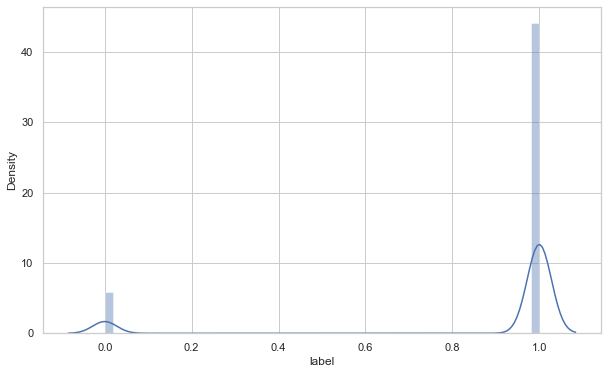

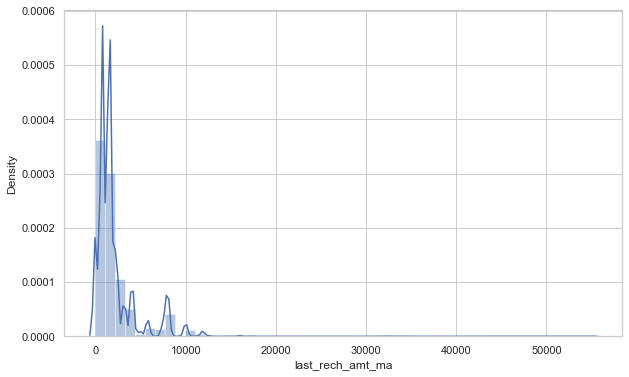

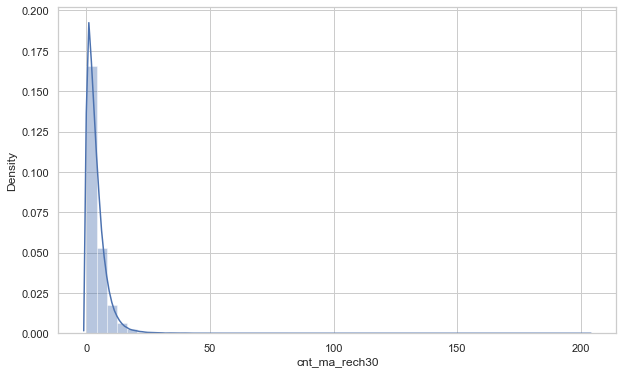

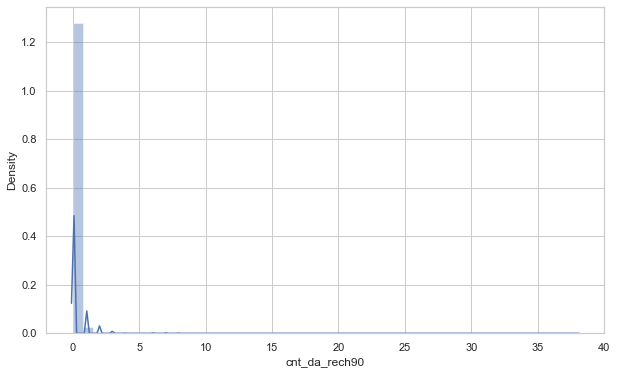

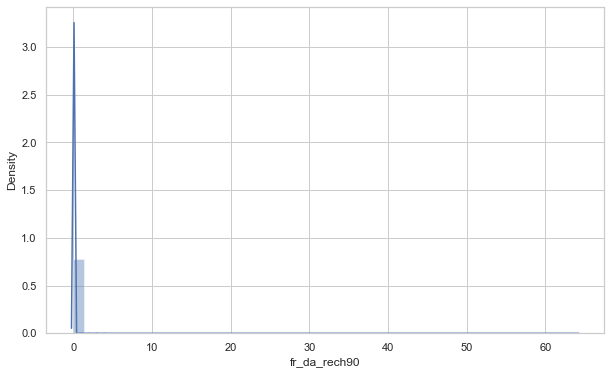

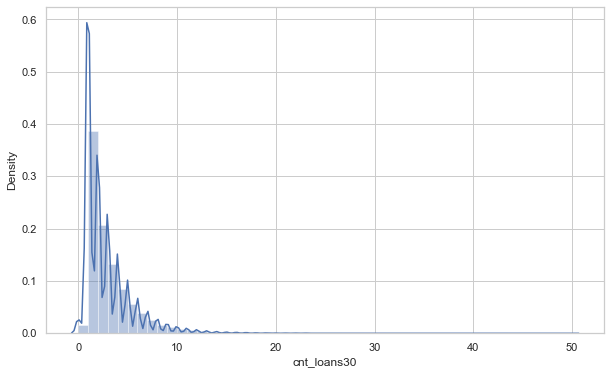

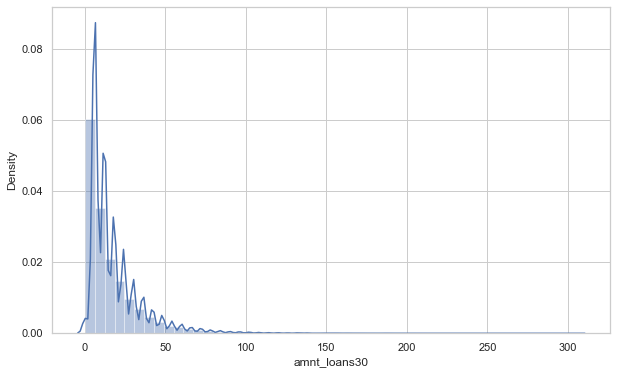

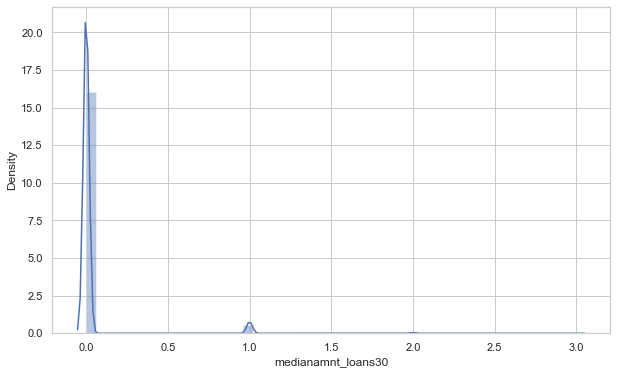

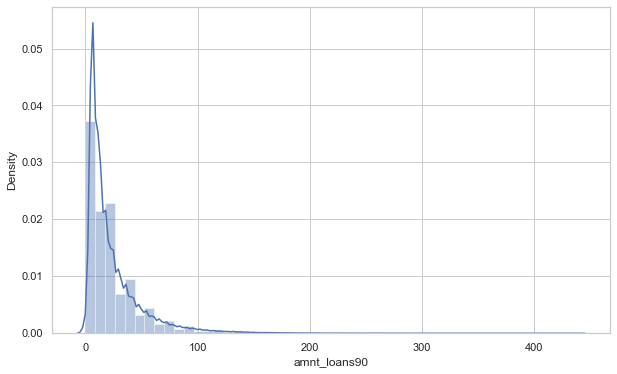

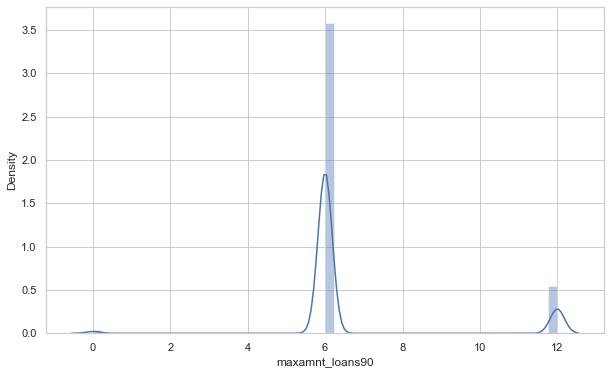

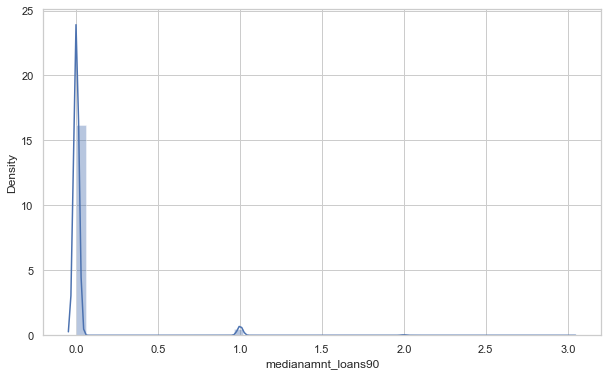

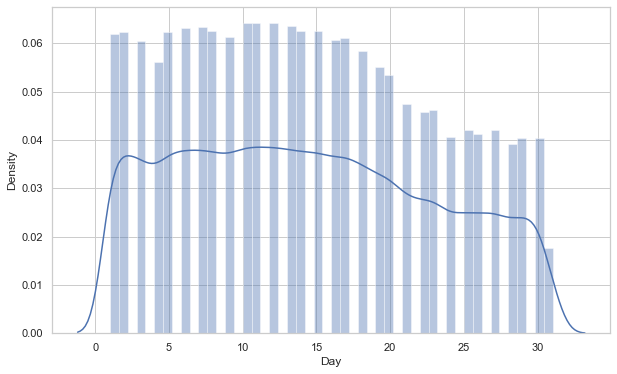

In [31]:
#Analyzing the discrete features  
for feature in discrete_feature:
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(dataset[feature],kde=True)
    plt.show()
    print()

label - Huge imbalance between 0 and 1 {1:success, 0:failure}

last_rech_amt_na - Amount of last recharge of main account is in between 0 to 10,000 (in Indonesian Rupiah) and it is highest 
                   in the interval of 0 - 2,000
                  
cnt_ma_rech30 -  The maximum number of time main account got recharged in last 30 days is between 0-25 and 5 is the maximum.

cnt_da_rech90 -  Number of times data account got recharged in last 90 days is upto 2

fr_da_rech90 - Frequency of data account recharged in last 90 days is zero - Irrelevant

cnt_loans30 - Number of loans taken by user in last 30 days is between 0 to 10 

amnt_loans30 - Total amount of loans taken by user in last 30 days is from 0 to 100

medianamnt_loans30 - Median of amounts of loan taken by the user in last 30 day is zero

amnt_loans90 - Total amount of loans taken by user in last 90 days is upto 100 and highest between 0 to 30

maxamnt_loans90 - maximum amount of loan taken by the user in last 90 days is 6(highest) and 12

medianamnt_loans90 - Median of amounts of loan taken by the user in last 90 days is 0(highest) and 1

Day - It is distributed normally between 2-31

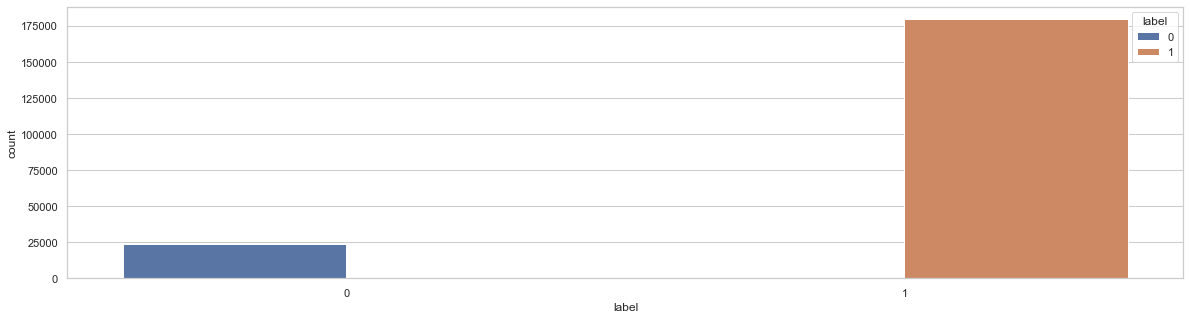

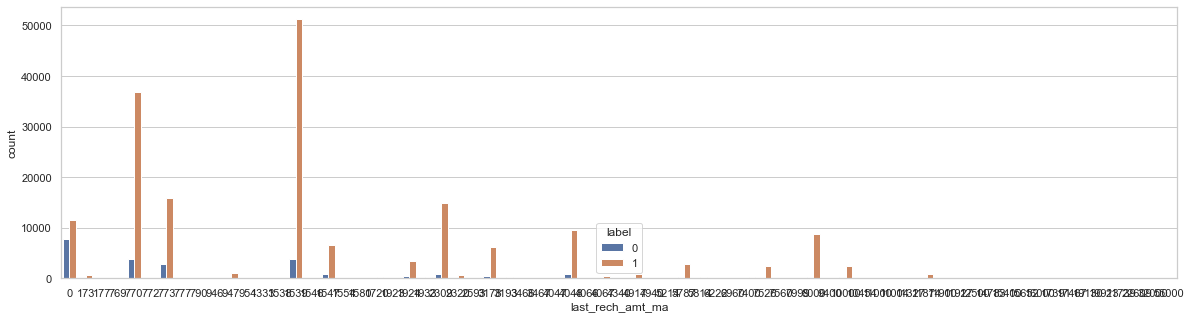

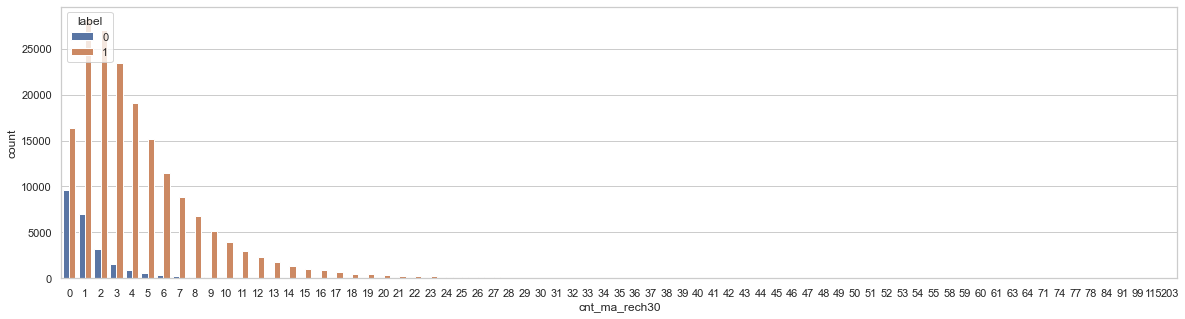

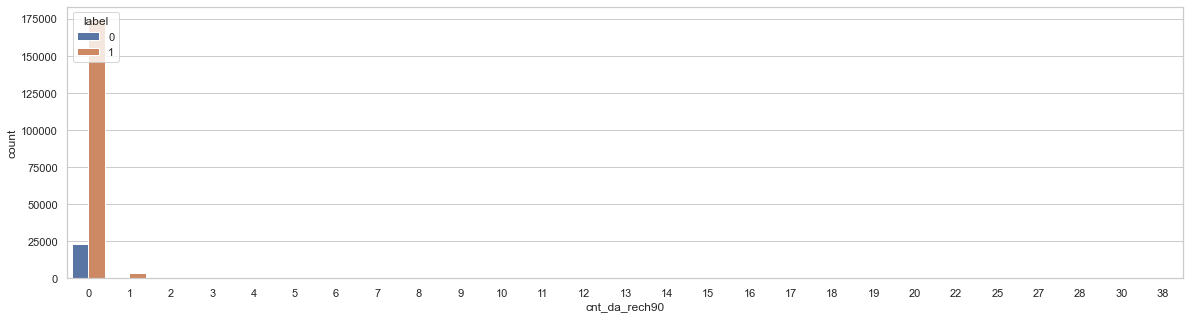

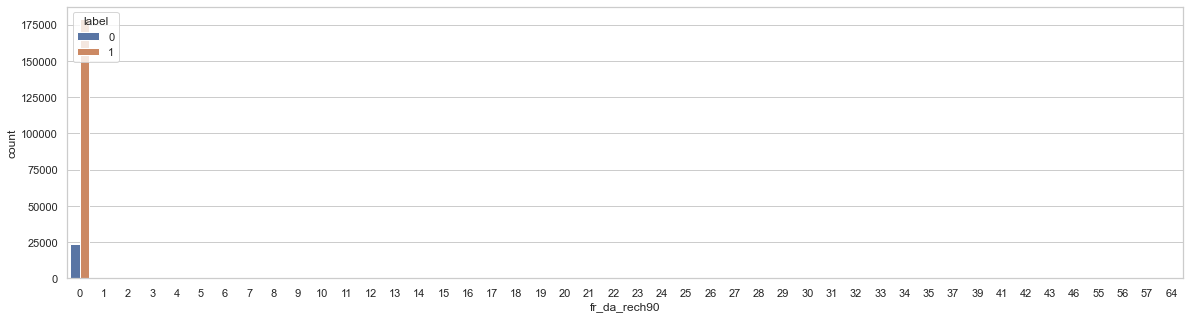

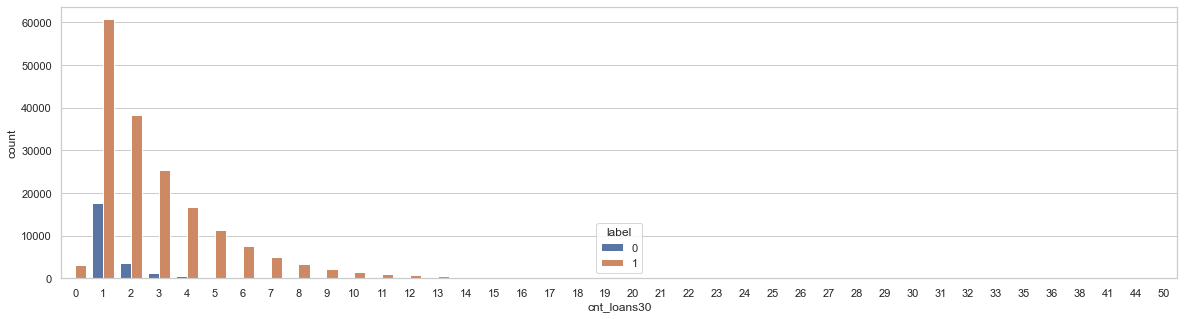

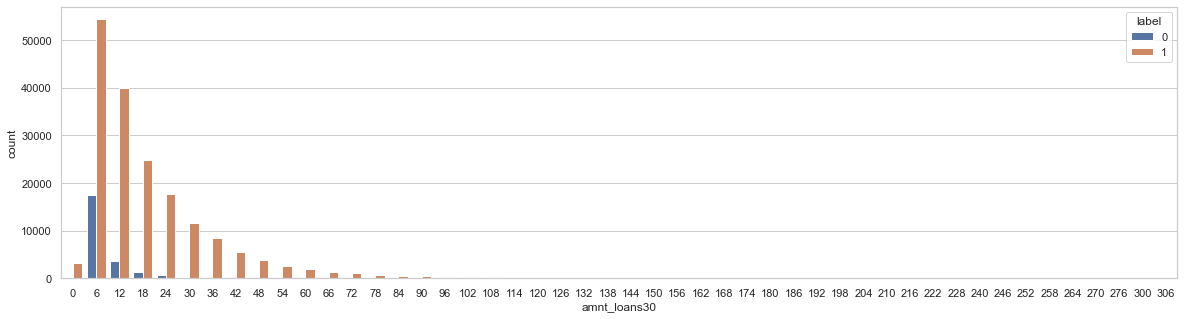

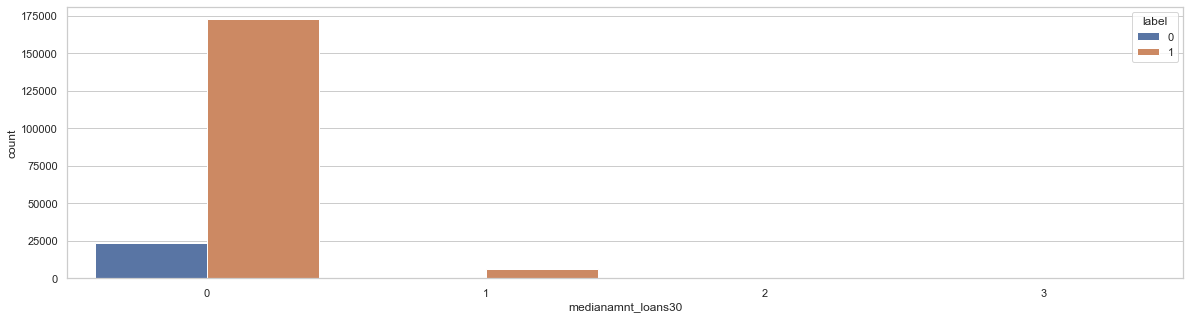

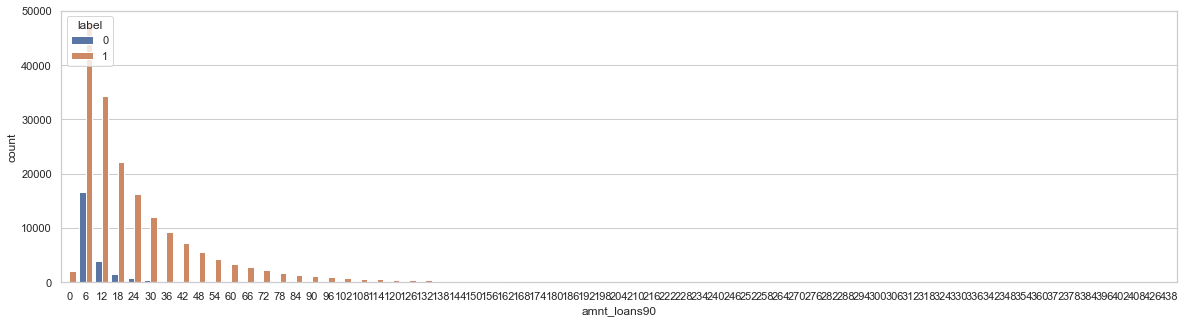

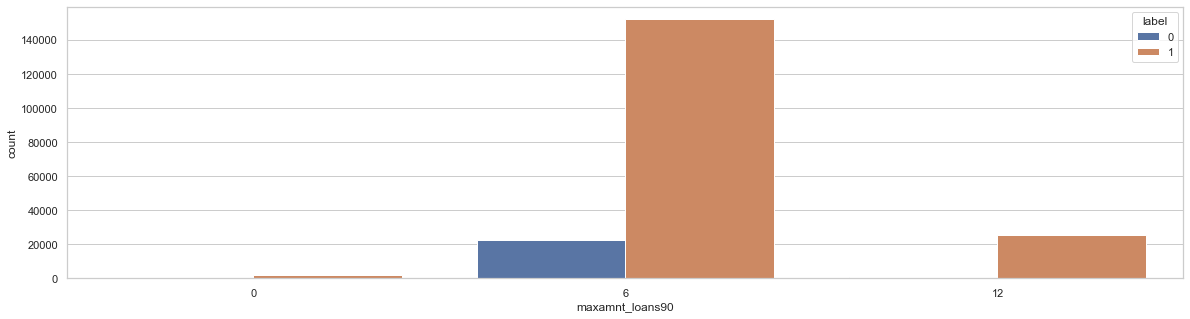

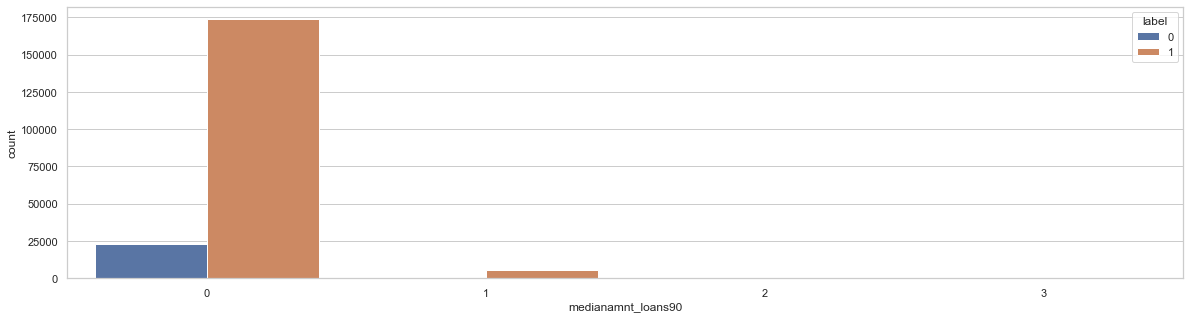

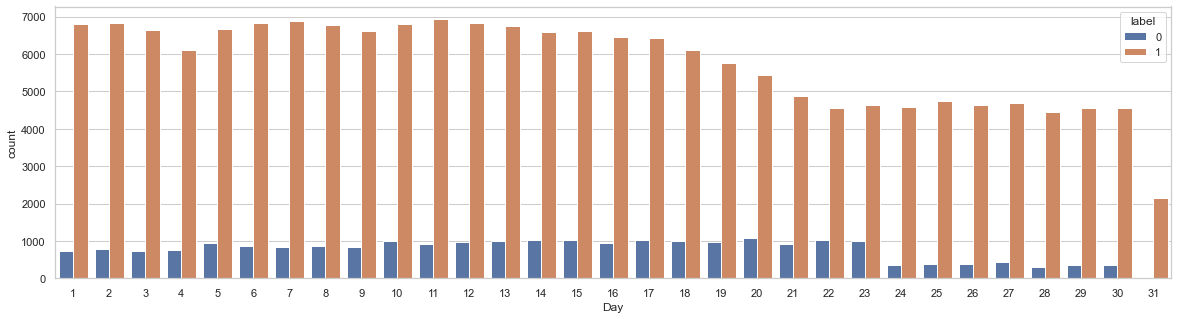

In [32]:
#Find the relationship between discrete_features and attrition
for feature in discrete_feature:
    plt.figure(figsize=(20,5))
    sns.countplot(feature, data=dataset, hue="label")

last_rech_amt_ma - user with less amount of last recharge of main account is likely to pay back

cnt_ma_rech30 -  users with less(i.e.1,2,3,4,5) maximum number of time main account got recharged in last 30 days likely to pay
                 back in time
                 
cnt_da_rech90 -  Irrelevant

fr_da_rech90 - irrelevant

cnt_loans30 - Number of loans taken by user only once in last 30 days have high possibility to pay back

amnt_loans30 - Users who have taken loans of total amount of 6 and 12 in last 30 days are likely to pay back

medianamnt_loans30 - Users whom median of amounts of loan in last 30 day is zero are likely to pay back

amt_loans90 - Users who have taken loans of total amount of 6 and 12 in last 90 days are likely to pay back

maxamnt_loans90 - Users whom maximum amount of loan is 6 in last 90 days have highest possibility to pay back

medianamnt_loans90 - Users who have median of amounts of loan taken in last 90 days is 0 are likely to pay back

day - high possibility between days 1-17

In [33]:
#continuous feature
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Variable Count : {}".format(len(continuous_feature)))

Continuous Variable Count : 22


In [34]:
dataset[continuous_feature].head()

,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,maxamnt_loans30,cnt_loans90,payback30,payback90,rental30,rental90
0,272,3055,3065,2,0,21,3078,1539,7,2,21,3078,1539,7,0,0,6,2,29,29,220,260
1,712,12122,12124,20,0,0,5787,5787,61,1,0,5787,5787,61,0,0,12,1,0,0,3691,3691
2,535,1398,1398,3,0,0,1539,1539,66,1,0,1539,1539,66,0,0,6,1,0,0,900,900
3,241,21,21,41,0,0,0,0,0,1,0,947,947,2,0,0,6,2,0,0,159,159
4,947,150,150,4,0,2,20029,2309,29,8,2,23496,2888,35,0,0,6,7,2,2,1098,1098


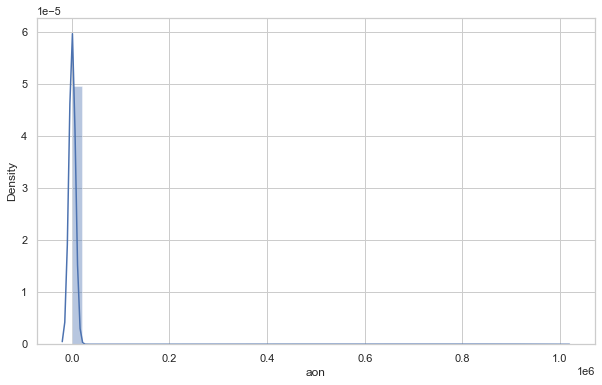

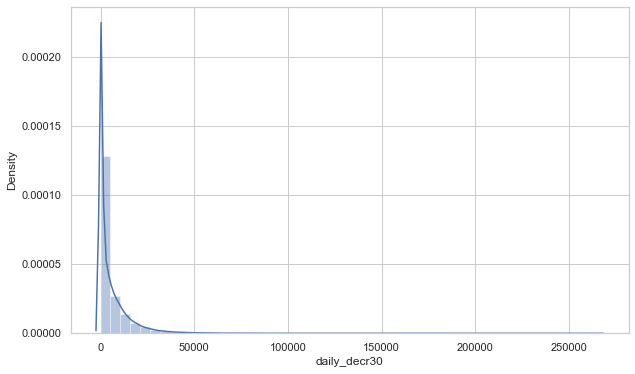

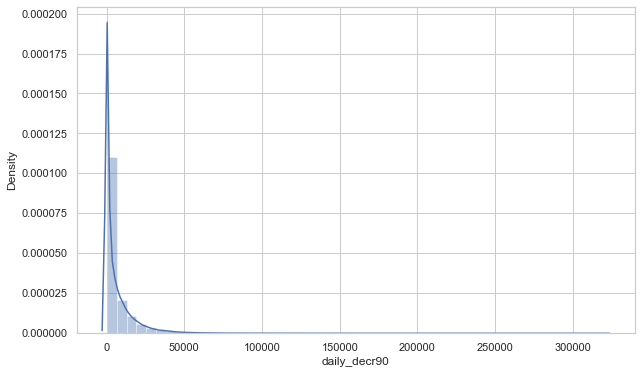

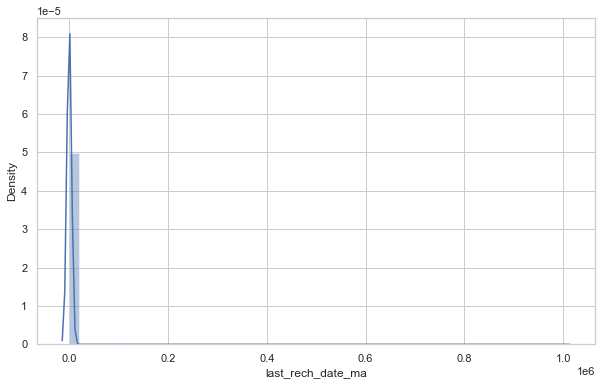

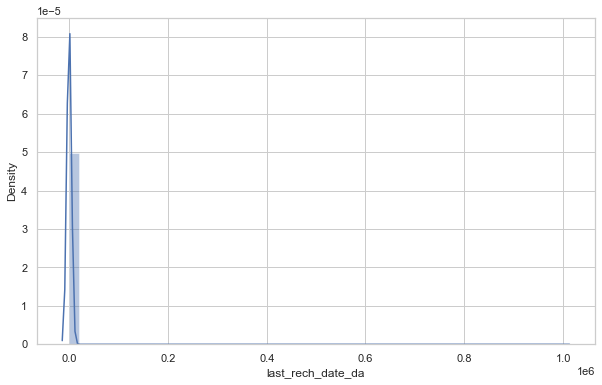

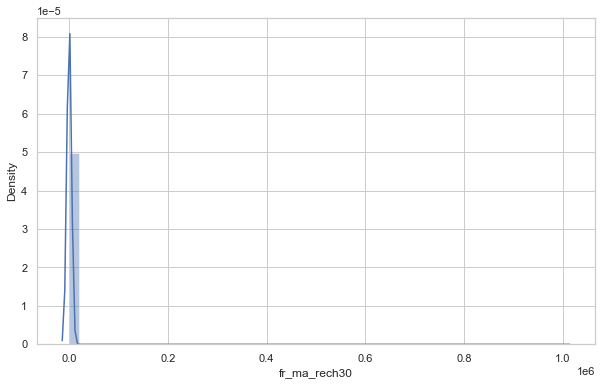

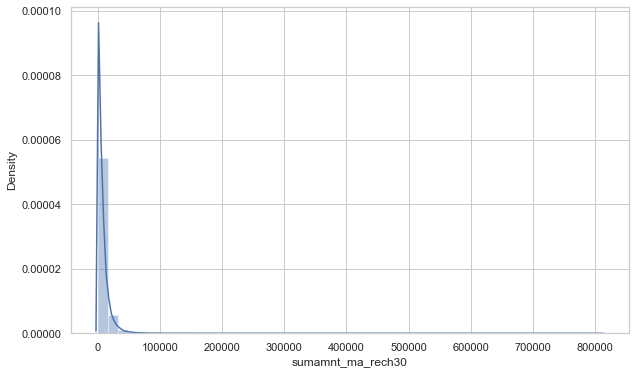

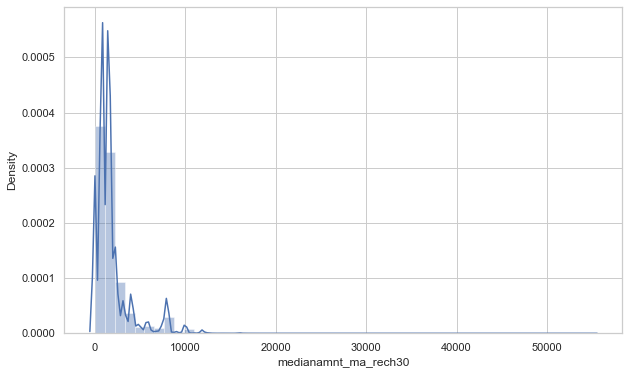

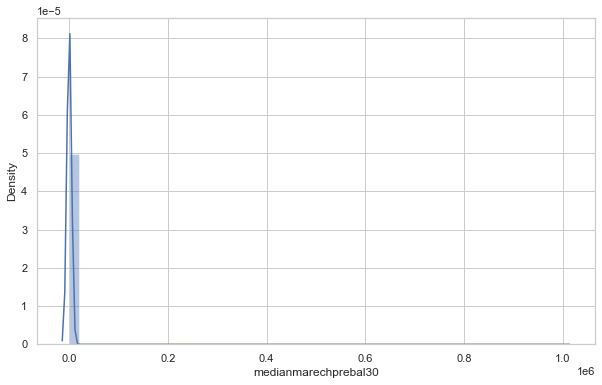

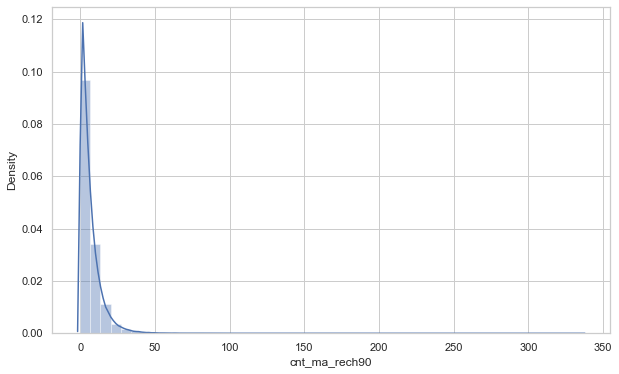

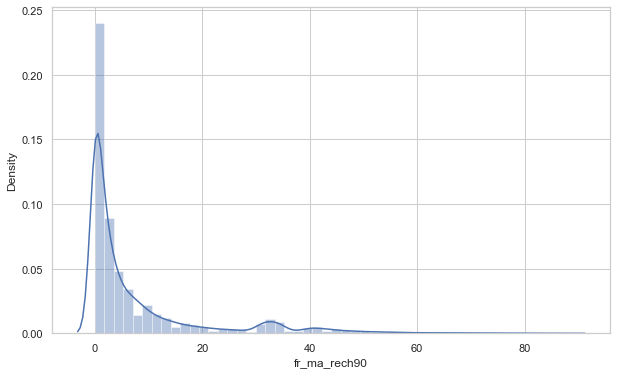

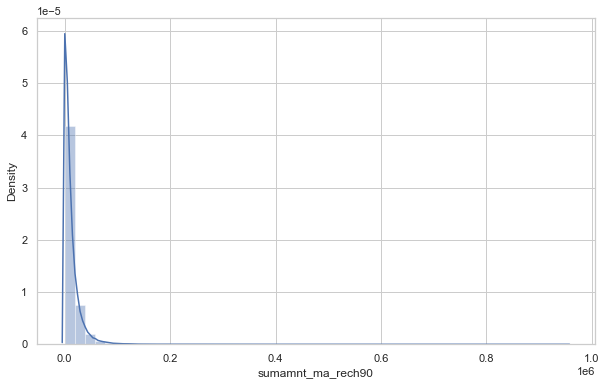

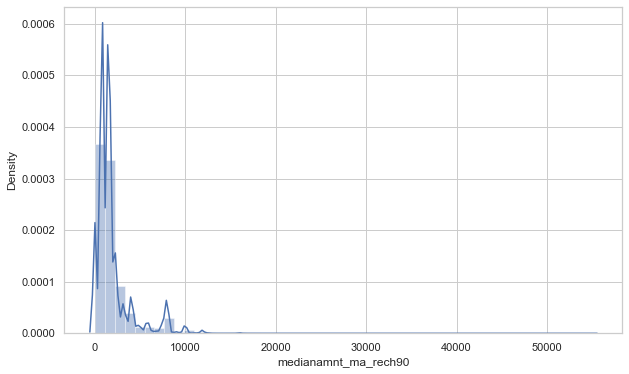

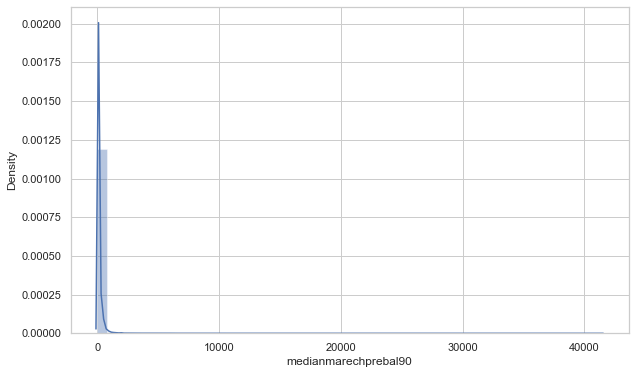

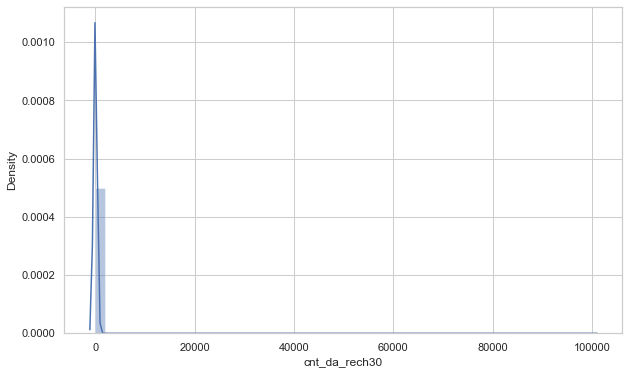

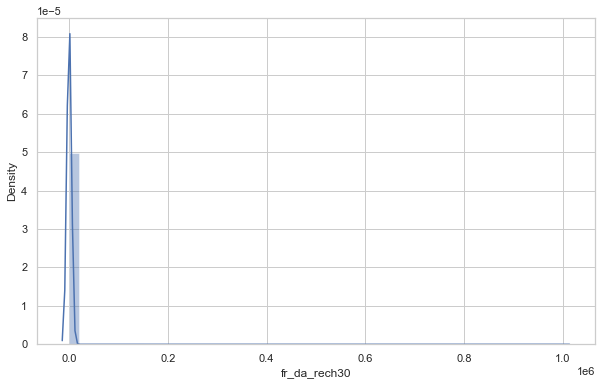

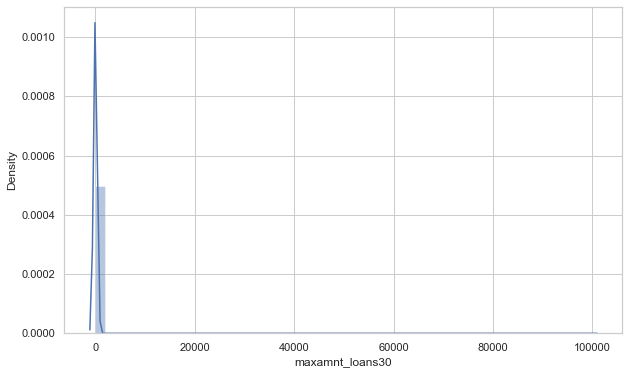

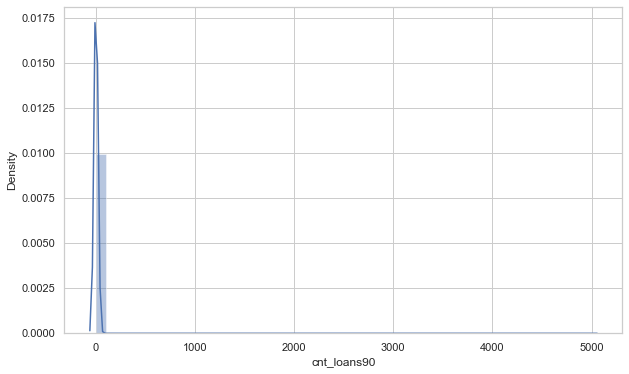

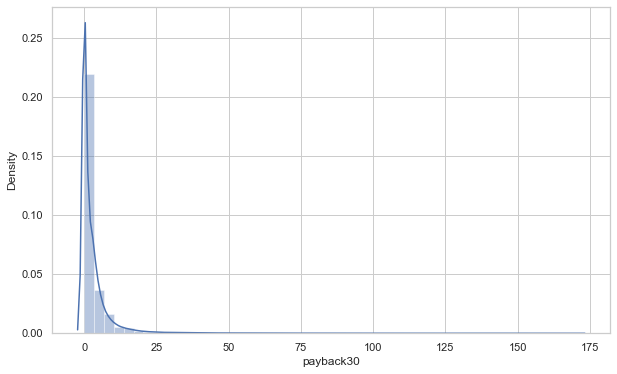

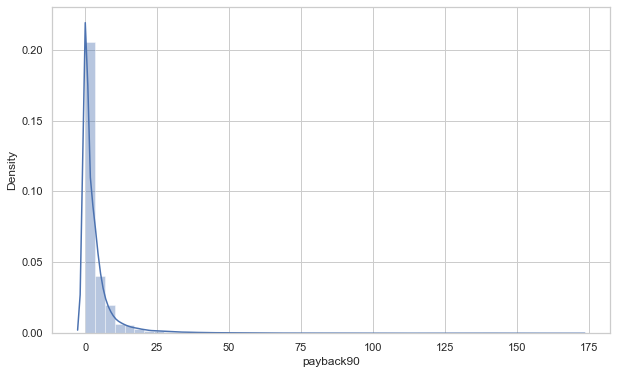

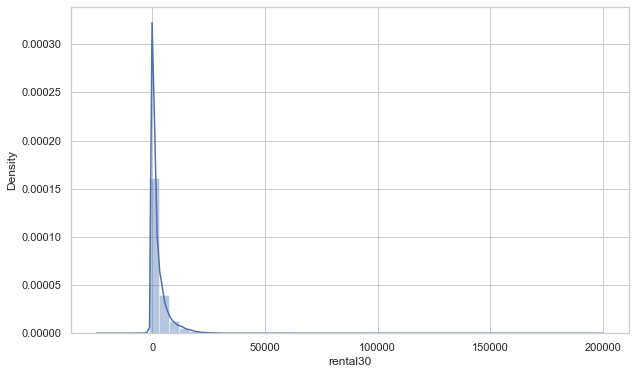

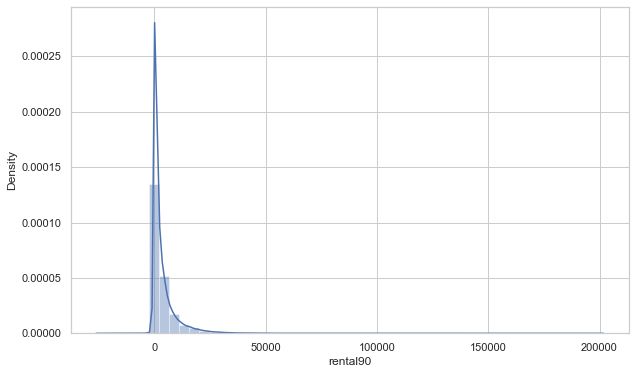

In [35]:
#Analyzing the continuous features  
for feature in continuous_feature:
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(dataset[feature],kde=True)
    plt.show()
    print()

aon - Irrelevant

daily_decr30 - Daily amount spent from main account,averaged over last 30 days (in Indonesian Rupiah) is in between 0 to 50,000

daily_decr90 - Daily amount spent from main account,averaged over last 90 days (in Indonesian Rupiah) is in between 0 to 50,000

last_rech_date_ma - Irrelevant

last_rech_date_da - Irrelevant

fr_ma_rech30 - Irrelevant

summant_ma_rech30 - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) is between 0 t0 50,000

medianamnt_ma_rech30 - Median of amount of recharges done in main account over last 30 days at user level(in Indonesian Rupiah)
                       is between 0 to 10,000 abd highest between 1,000 t0 3,000

medianmarechprebal30 - Irrelevant

cnt_ma_rech90 - Number of times main account got recharged in last 90 days is between 0 to 50 and highest at 10 and 20

fr_ma_rech90 - Frequency of main account recharged in last 90 days is 0 to 40 

medianamnt_ma_rech90 - Median of amount of recharges done in main account over last 90 days at user level(in Indonasian Rupiah)
                       is between 10 to 10,000
                       
medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)                        is between 0 to 1,000

cnt_da_rech30 - Irrelevant

fr_da_rech30 - Irrelevant

maxamnt_loans30 - Irrelevant

cnt_loans90 - Irrelevant

payback30 - Average payback time in days over last 30 day is 0-25

payback90 - Average payback time in days over last 390 day is 0-25

rental30 - Average main account balance over last 30 days is 0 - 25,000

rental90 - Average main account balance over last 30 days is 0 - 25,000

In [36]:
#categorical Values
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Categorical Count : {}'.format(len(categorical_feature)))

Categorical Count : 1


In [37]:
categorical_feature

['Month']

Month
------------------------
JUL    84605
JUN    78154
AUG    40360
Name: Month, dtype: int64


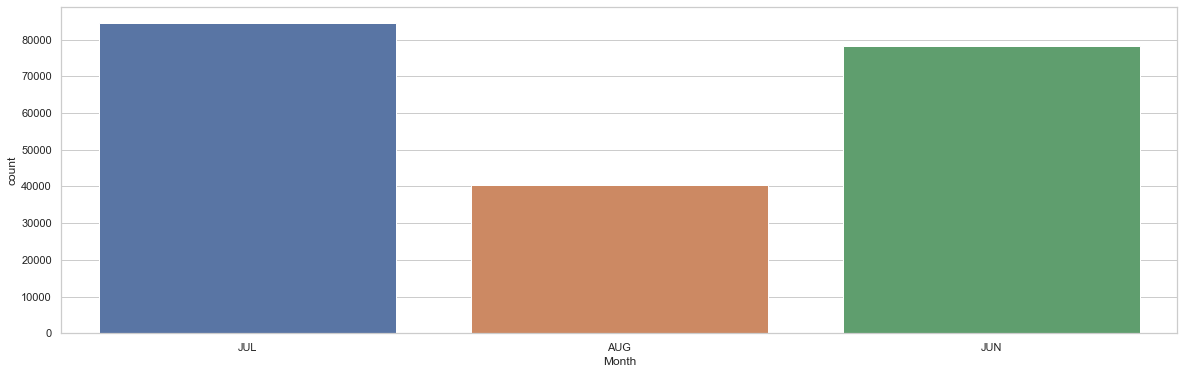

In [38]:
#cardinality values
for feature in categorical_feature:
    print(feature)
    print("------------------------")
    print(dataset[feature].value_counts())
    plt.figure(figsize=(20,6))
    sns.countplot(feature,data=dataset)
    plt.show()
    print()

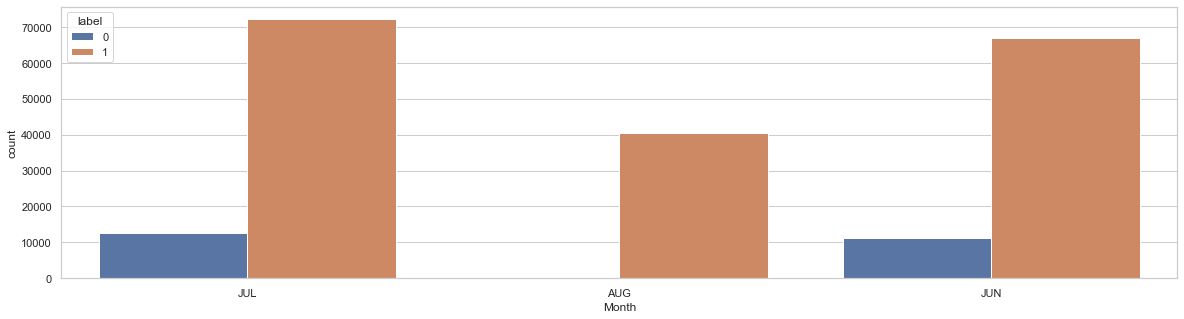

In [39]:
##Find the relationship between categorical_features and attrition
for feature in categorical_feature:
    plt.figure(figsize=(20,5))
    sns.countplot(feature, data=dataset, hue="label")

month - highest possibility of users paying back is in the month of july

In [40]:
#labeling the categorical values by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Month']=le.fit_transform(dataset['Month'].values)   

In [41]:
#checking the coffecient
cor=dataset.corr()
cor

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Month,Day
label,1.000000,-0.003257,0.161801,0.160071,0.003291,0.000777,0.120954,0.226554,0.000269,0.193586,0.130064,-0.003661,0.226713,0.073161,0.197374,0.109698,0.035350,0.003886,-0.000628,0.000457,-0.006770,0.188395,0.189479,0.000591,0.032436,0.005160,0.192480,0.080027,0.026590,0.037491,0.038032,0.053045,0.070182,-0.140589,0.013425
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,0.000421,0.003524,0.004244,-0.002813,0.005023,0.000776,0.003917,-0.000905,0.001694,0.001094,0.001037,0.005448,-0.002216,-0.002162,-0.002675,0.004584,-0.000893,-0.002683,-0.001383,0.004017,0.002386,0.002615,-0.000946,-0.000880,0.002036,-0.000036
daily_decr30,0.161801,0.000969,1.000000,0.977541,-0.000091,-0.002064,0.275019,0.446655,-0.000877,0.634543,0.295466,-0.001180,0.583607,-0.080246,0.761486,0.257517,0.036981,0.000451,-0.001628,0.038081,0.020153,0.360212,0.466745,0.000184,-0.012969,0.008839,0.559282,0.398444,-0.030209,0.016807,0.036397,0.441567,0.457885,-0.513779,0.004852
daily_decr90,0.160071,0.000218,0.977541,1.000000,0.000346,-0.002327,0.263308,0.421961,-0.000623,0.601718,0.283011,-0.000729,0.589580,-0.081446,0.767458,0.250213,0.035848,0.000385,-0.001658,0.030401,0.015913,0.334494,0.443114,0.000193,-0.007262,0.009321,0.563155,0.395467,-0.027501,0.009649,0.030271,0.434174,0.470830,-0.535329,-0.023529
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,0.001663,-0.001630,0.004292,0.003790,0.000763,0.001790,-0.000812,-0.001030,-0.003495,-0.003622,-0.003602,-0.002451,0.000764,0.000470,0.001046,0.000009,-0.000139,0.000421,-0.001415,0.001097,-0.002582,-0.002098,-0.001352,-0.002128,0.002401,0.000392
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-0.000206,0.001266,0.003041,0.000761,0.000996,-0.000776,0.000423,0.004236,-0.003657,0.000025,-0.001895,-0.000234,0.000120,0.000155,0.000031,-0.001774,-0.000903,-0.000035,0.001165,-0.002726,-0.000099,0.000307,0.003119,0.002617,0.002469,0.000996
last_rech_amt_ma,0.120954,0.003507,0.275019,0.263308,-0.000335,0.000086,1.000000,-0.009934,0.002783,0.437552,0.792470,-0.002577,0.010124,0.104564,0.416616,0.816742,0.124686,-0.001666,-0.003547,0.013932,0.015862,-0.034258,0.002538,0.000788,0.018341,0.000020,0.008395,0.147631,0.011954,-0.031058,-0.018591,0.125918,0.119669,-0.090947,0.029866
cnt_ma_rech30,0.226554,-0.003179,0.446655,0.421961,0.003927,0.001216,-0.009934,1.000000,0.001209,0.654083,-0.019298,0.000284,0.885242,-0.159339,0.580163,-0.059096,0.011675,0.002304,-0.002785,0.010665,0.006307,0.763976,0.750294,0.000337,-0.062453,0.014484,0.682555,0.170374,-0.063602,0.026613,0.001191,0.230347,0.226588,-0.143042,0.069411
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,0.000395,-0.000908,0.002800,0.000803,-0.001948,-0.000906,-0.001894,-0.003019,-0.000474,-0.001656,0.001475,-0.001972,0.002444,0.002246,-0.001031,-0.000625,0.003556,0.002458,-0.001883,-0.001401,0.000760,0.000397,-0.001688,-0.000975,0.002384,0.000972
sumamnt_ma_rech30,0.193586,0.000421,0.634543,0.601718,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000,0.486749,-0.000001,0.593010,-0.075452,0.889206,0.418869,0.088148,0.002526,-0.001742,0.018110,0.016744,0.487372,0.527106,0.001732,-0.036323,0.009308,0.480385,0.255176,-0.039553,-0.012520,-0.024917,0.270852,0.257157,-0.145295,0.056985


<AxesSubplot:>

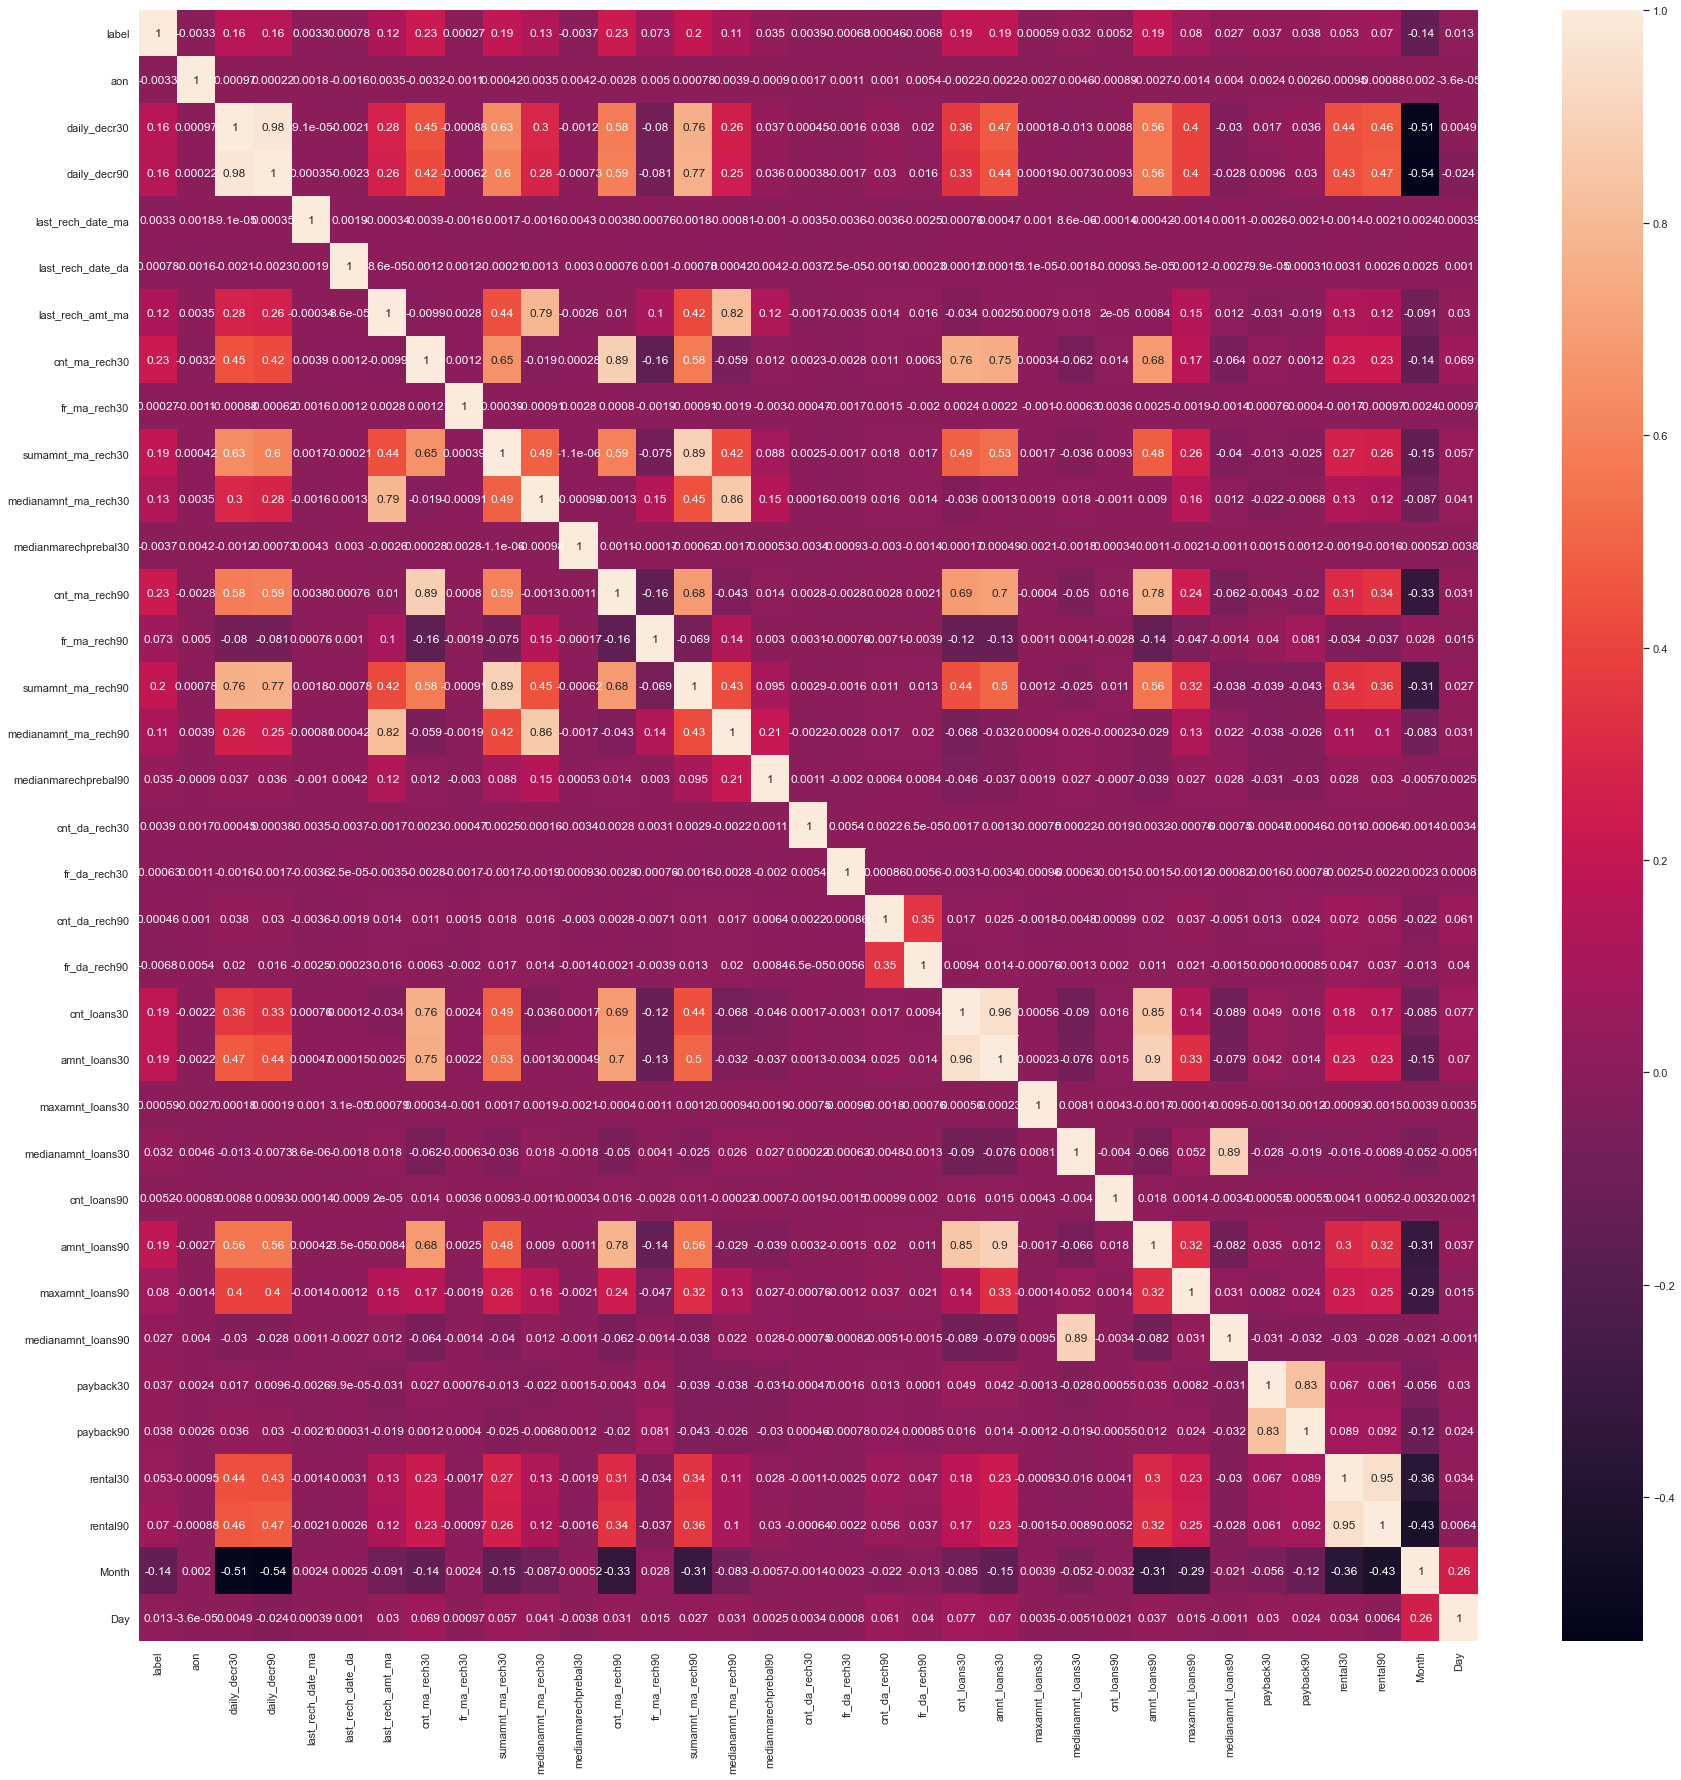

In [42]:
#using heatmap 
plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True)

In [43]:
#since there are to many columns, sorting correlation with label in desending order
dataset.corr()["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.226713
cnt_ma_rech30           0.226554
sumamnt_ma_rech90       0.197374
sumamnt_ma_rech30       0.193586
amnt_loans90            0.192480
amnt_loans30            0.189479
cnt_loans30             0.188395
daily_decr30            0.161801
daily_decr90            0.160071
medianamnt_ma_rech30    0.130064
last_rech_amt_ma        0.120954
medianamnt_ma_rech90    0.109698
maxamnt_loans90         0.080027
fr_ma_rech90            0.073161
rental90                0.070182
rental30                0.053045
payback90               0.038032
payback30               0.037491
medianmarechprebal90    0.035350
medianamnt_loans30      0.032436
medianamnt_loans90      0.026590
Day                     0.013425
cnt_loans90             0.005160
cnt_da_rech30           0.003886
last_rech_date_ma       0.003291
last_rech_date_da       0.000777
maxamnt_loans30         0.000591
cnt_da_rech90           0.000457
fr_ma_rech30            0.000269
fr_da_rech

fr_da_rech30, fr_ma_rech30, cnt_da_rech90 , maxamnt_loans30 ,last_rech_date_da, cnt_loans90, cnt_da_rech30, last_rech_date_ma,  aon, medianmarechprebal30, fr_da_rech90 are close to zero .So droping these values

In [44]:
dataset.drop(["fr_da_rech30","fr_ma_rech30","cnt_da_rech90","maxamnt_loans30","last_rech_date_da","cnt_loans90","cnt_da_rech30","last_rech_date_ma","aon","medianmarechprebal30","fr_da_rech90"],axis=1,inplace=True)

In [45]:
dataset.head()

,label,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Month,Day
0,0,3055,3065,1539,2,3078,1539,2,21,3078,1539,7,2,12,0,12,6,0,29,29,220,260,1,20
1,1,12122,12124,5787,1,5787,5787,1,0,5787,5787,61,1,12,0,12,12,0,0,0,3691,3691,0,10
2,1,1398,1398,1539,1,1539,1539,1,0,1539,1539,66,1,6,0,6,6,0,0,0,900,900,0,19
3,1,21,21,947,0,0,0,1,0,947,947,2,2,12,0,12,6,0,0,0,159,159,2,6
4,1,150,150,2309,7,20029,2309,8,2,23496,2888,35,7,42,0,42,6,0,2,2,1098,1098,2,22


In [46]:
dataset.shape

(203119, 24)

now there are 203119 rows and 24 columns

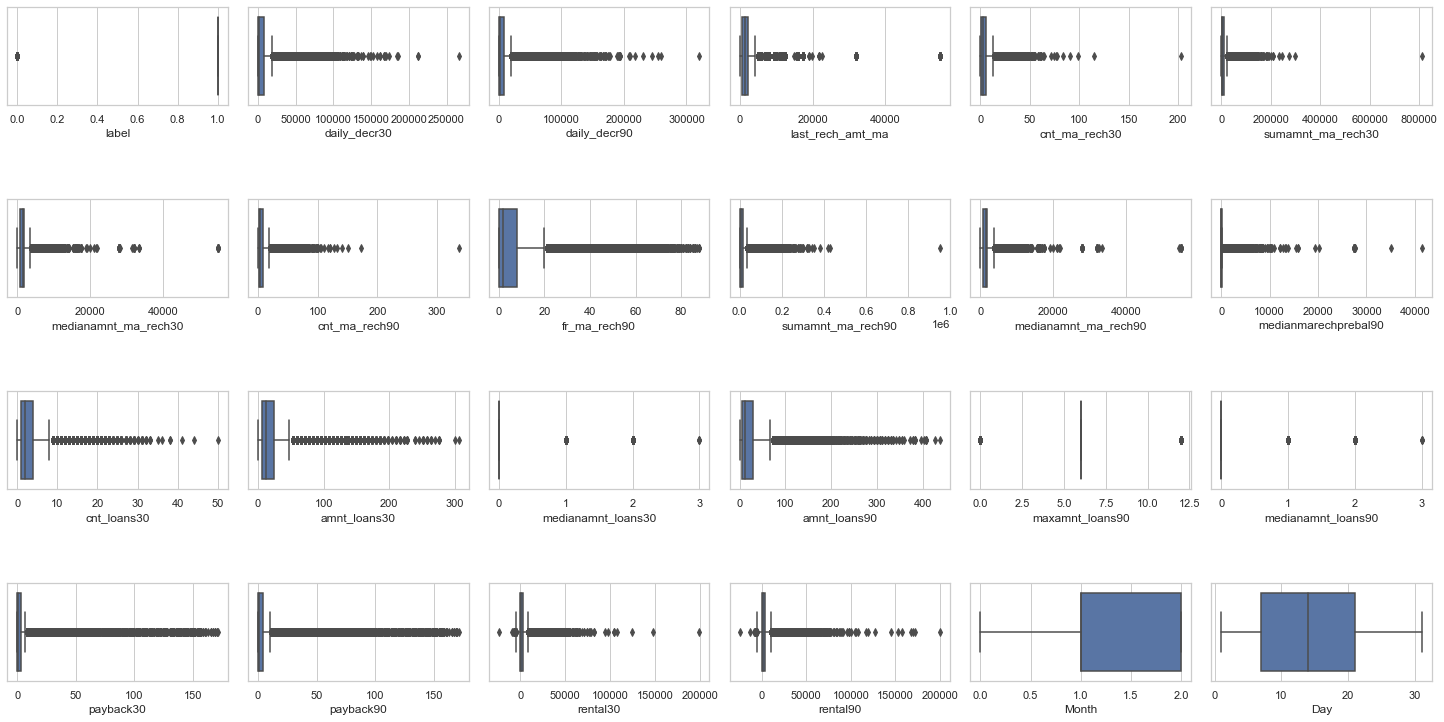

In [47]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=6,nrows=4, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in dataset.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

there are outliers in almost all of the columns

In [48]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

In [49]:
#fixing the outlier
#function to apply IQR
#Also there can be no negative value so the lower bridge is replaced with 25th percentile for the number =<0
def outlier_IQR3(data_frame,feature_name):
    histogram(data_frame,feature_name)
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    dataset.loc[data_frame[feature_name]>=upper_bridge,feature_name]=upper_bridge
    dataset.loc[data_frame[feature_name]<=0,feature_name]=lower_bridge
    histogram(data_frame,feature_name)

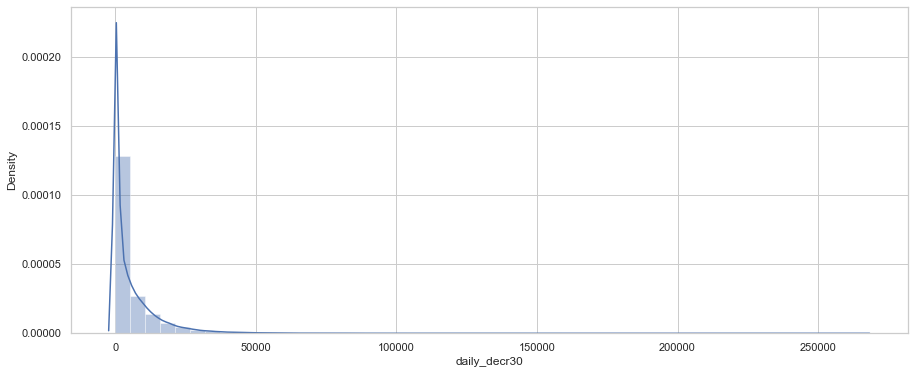

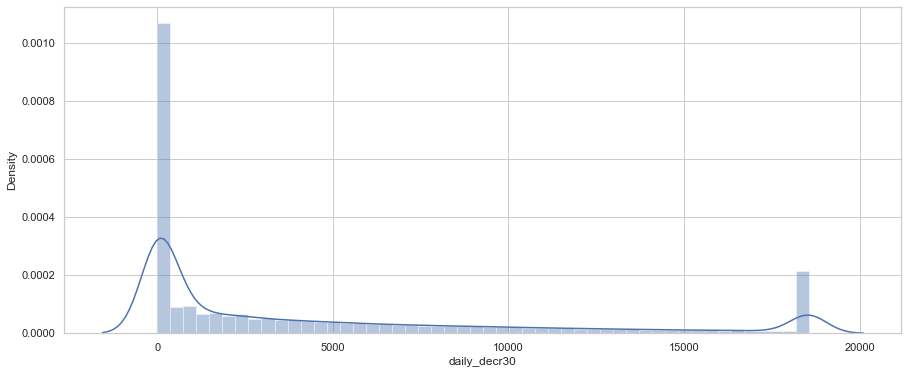

In [50]:
#daily_decr30
outlier_IQR3(dataset,"daily_decr30")

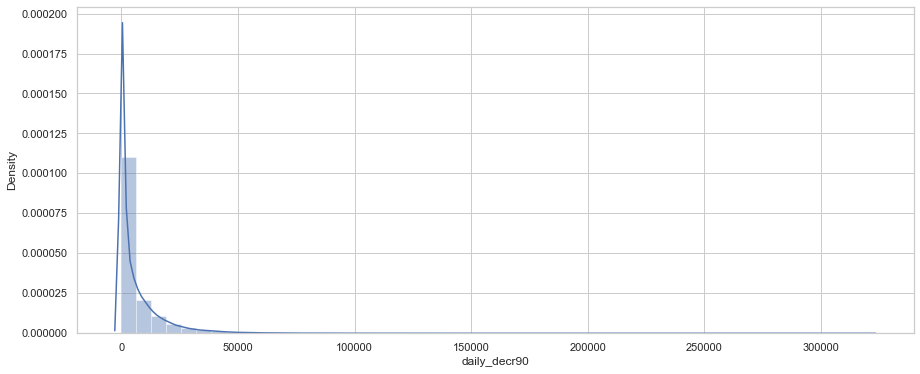

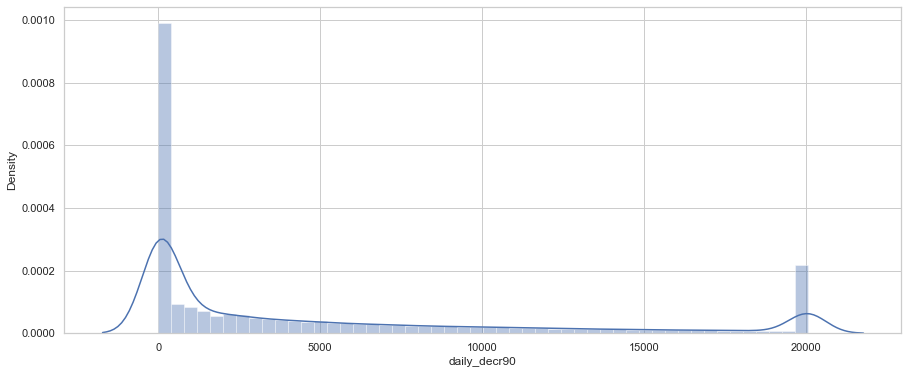

In [51]:
#daily_decr90
outlier_IQR3(dataset,"daily_decr90")

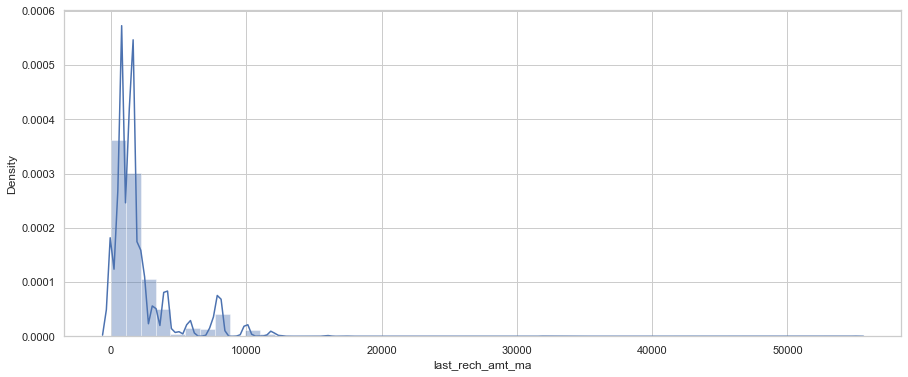

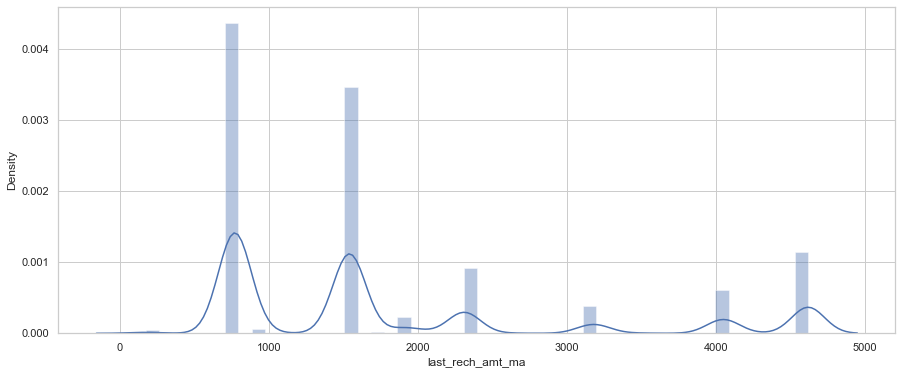

In [52]:
#last_rech_amt_ma
outlier_IQR3(dataset,"last_rech_amt_ma")

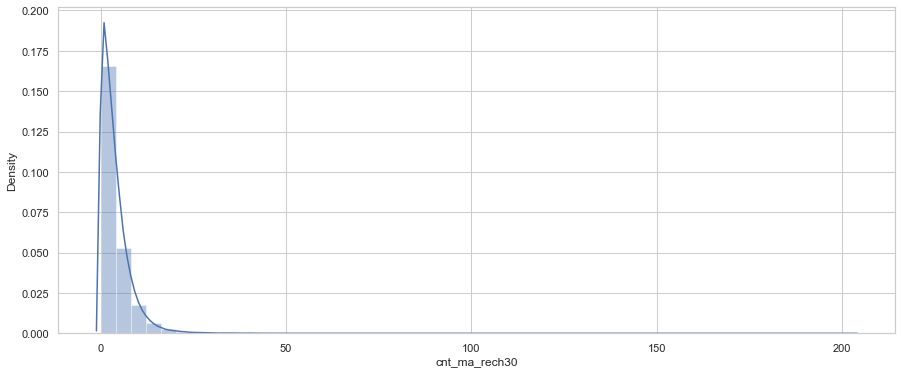

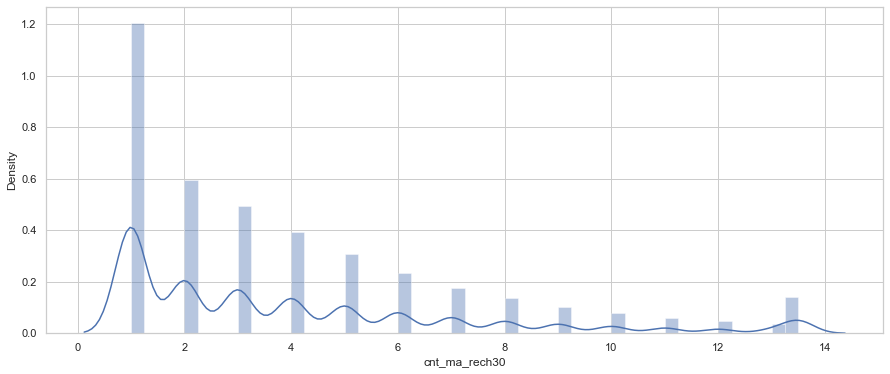

In [53]:
#cnt_ma_rech30
outlier_IQR3(dataset,"cnt_ma_rech30")

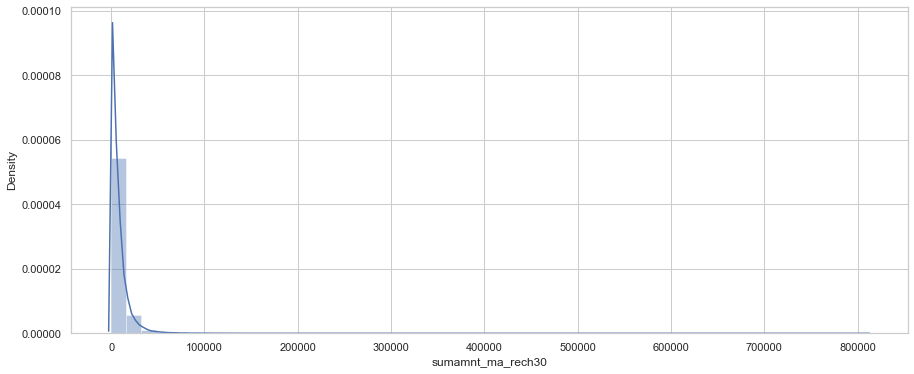

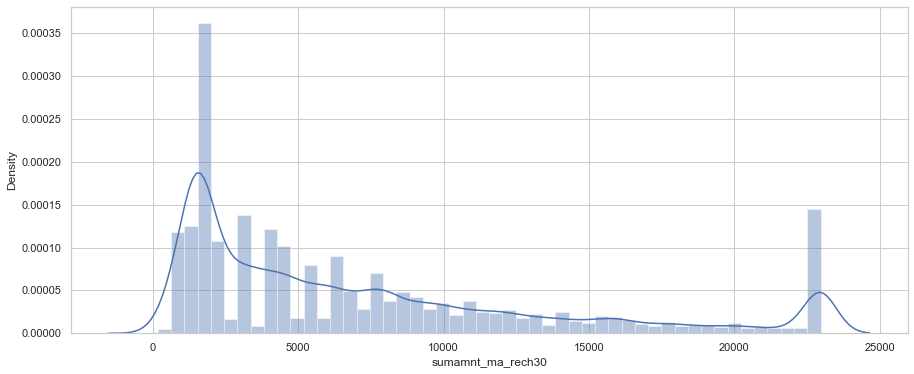

In [54]:
#sumamnt_ma_rech30
outlier_IQR3(dataset,"sumamnt_ma_rech30")

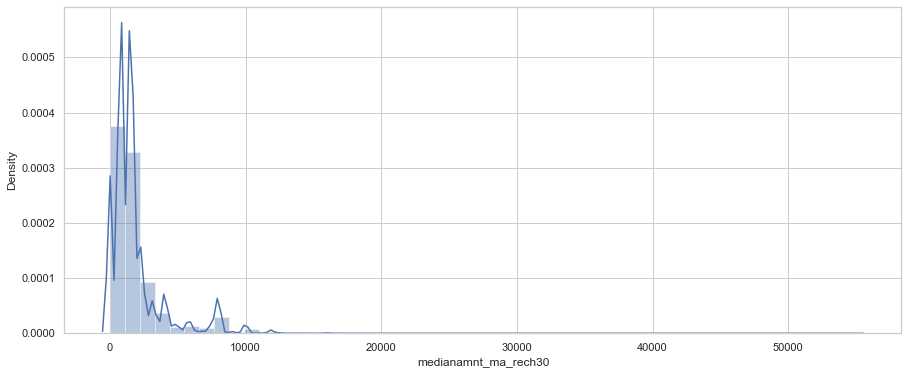

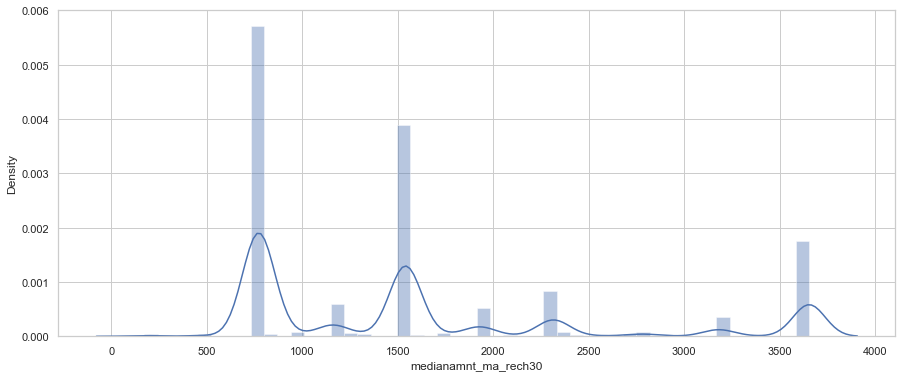

In [55]:
#medianamnt_ma_rech30
outlier_IQR3(dataset,"medianamnt_ma_rech30")

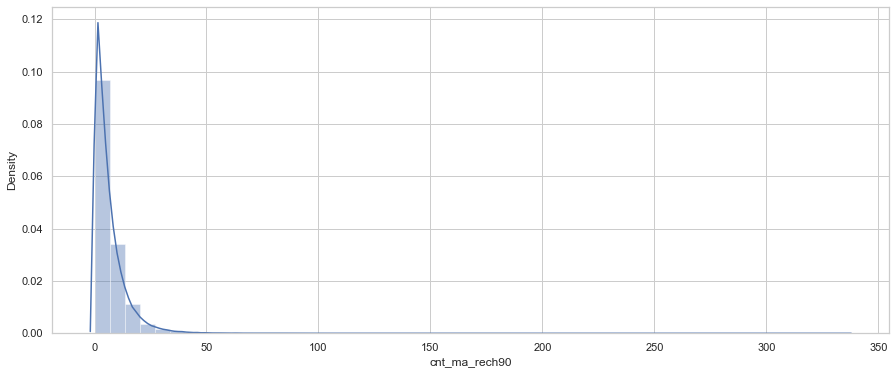

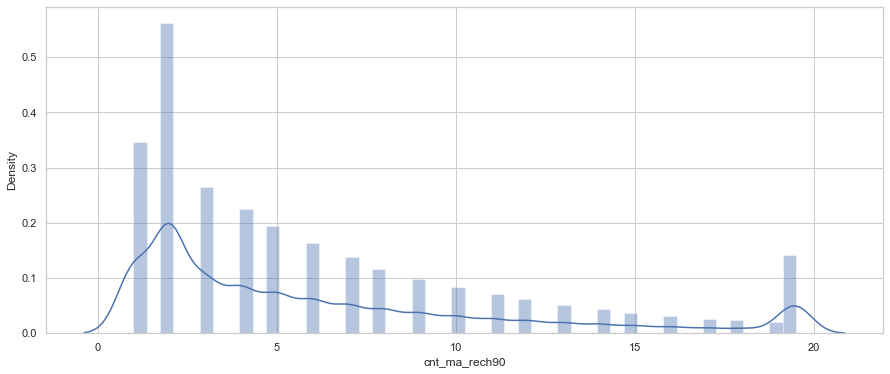

In [56]:
#cnt_ma_rech90
outlier_IQR3(dataset,"cnt_ma_rech90")

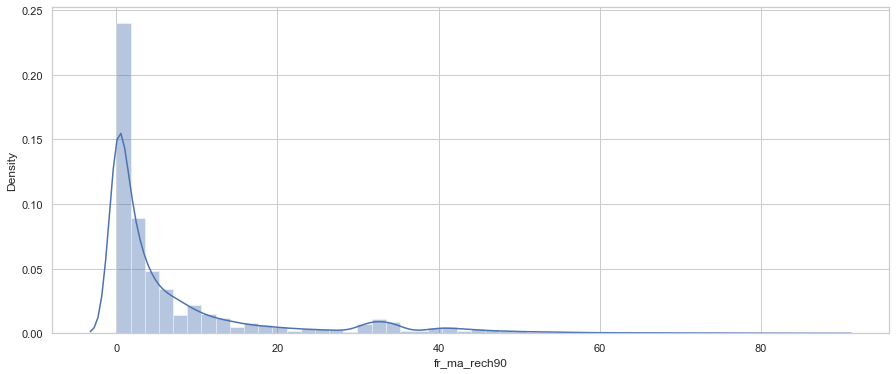

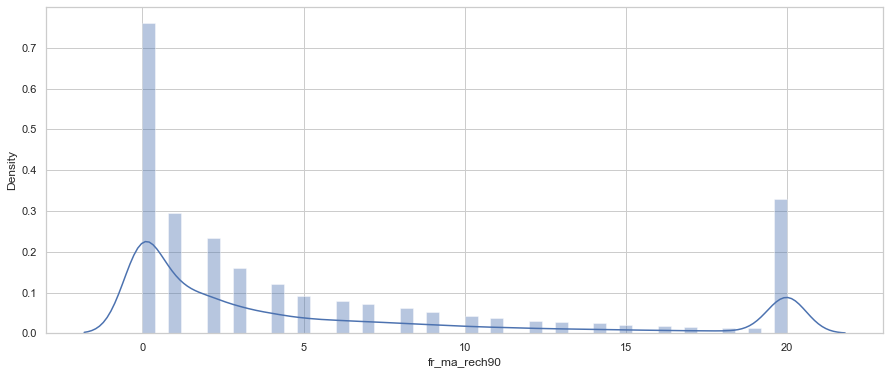

In [57]:
#fr_ma_rech90
outlier_IQR3(dataset,"fr_ma_rech90")

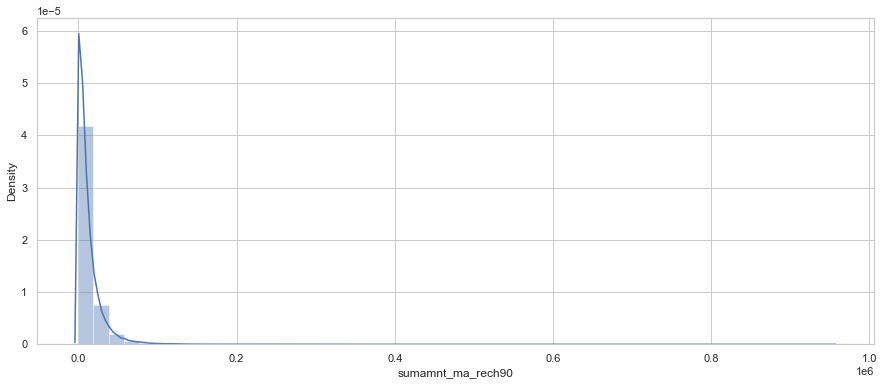

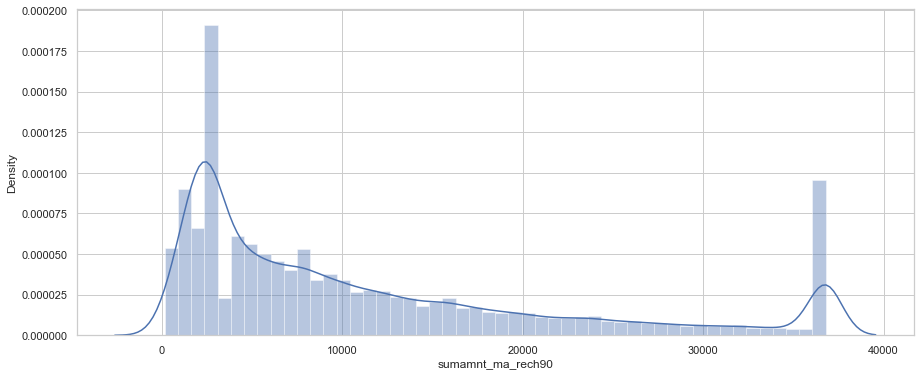

In [58]:
#sumamnt_ma_rech90
outlier_IQR3(dataset,"sumamnt_ma_rech90")

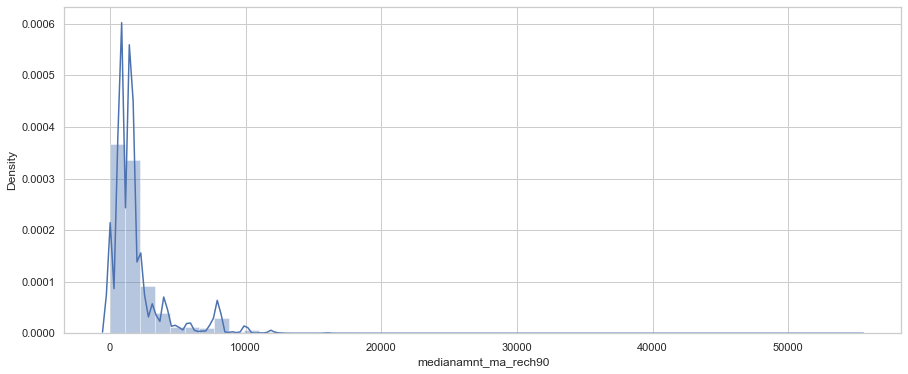

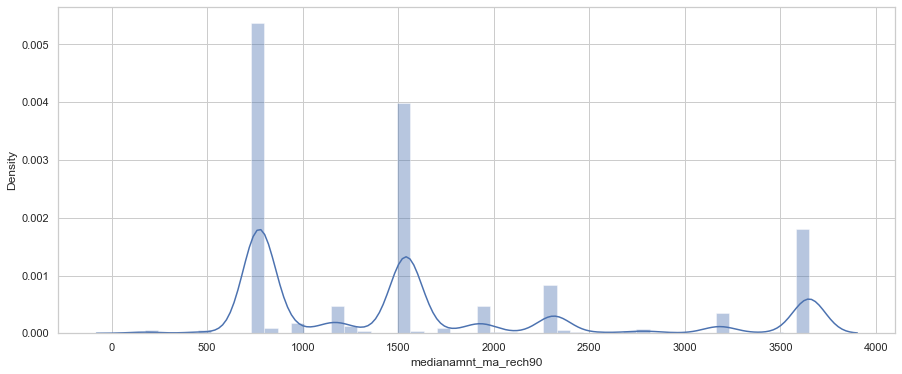

In [59]:
#medianamnt_ma_rech90
outlier_IQR3(dataset,"medianamnt_ma_rech90")

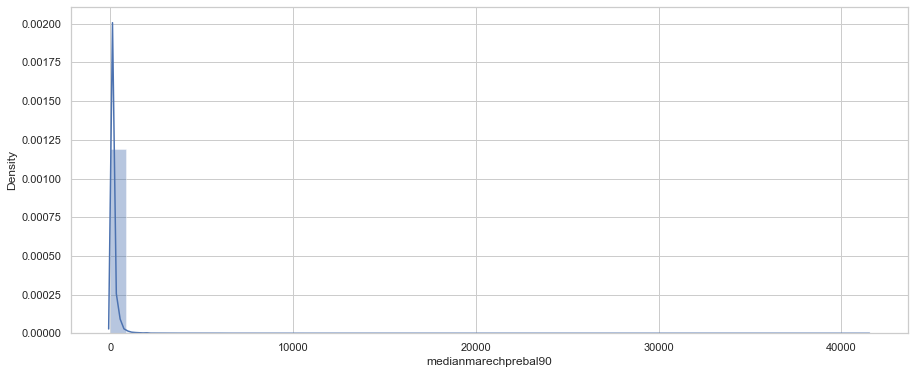

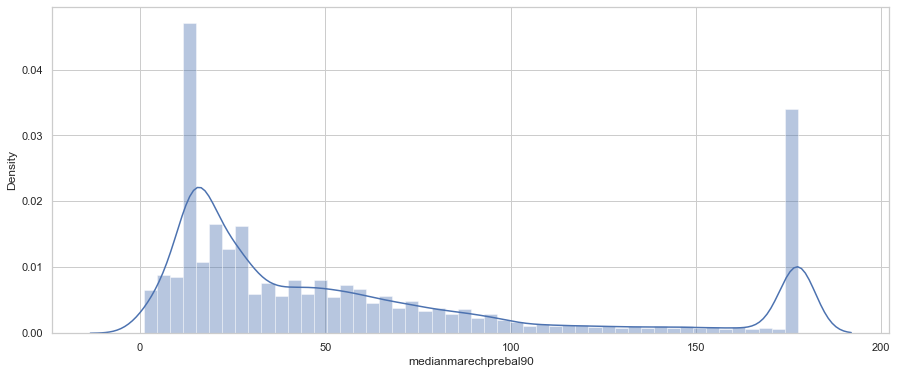

In [60]:
#medianmarechprebal90
outlier_IQR3(dataset,"medianmarechprebal90")

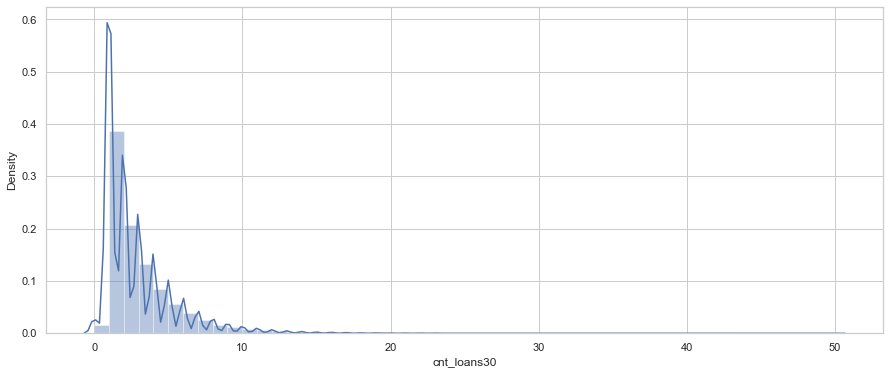

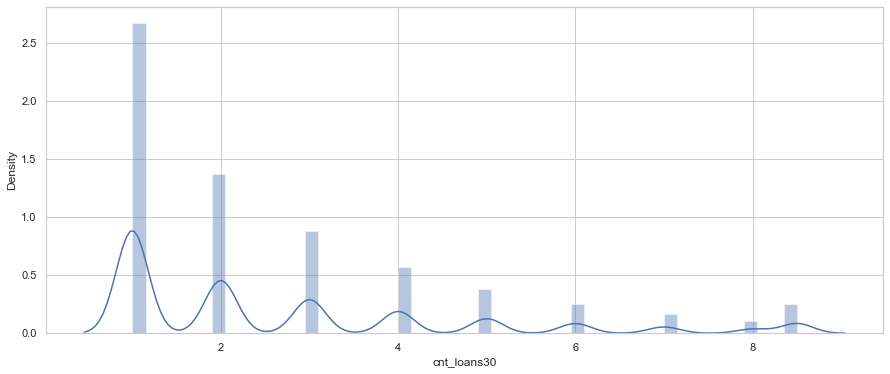

In [61]:
#cnt_loans30
outlier_IQR3(dataset,"cnt_loans30")

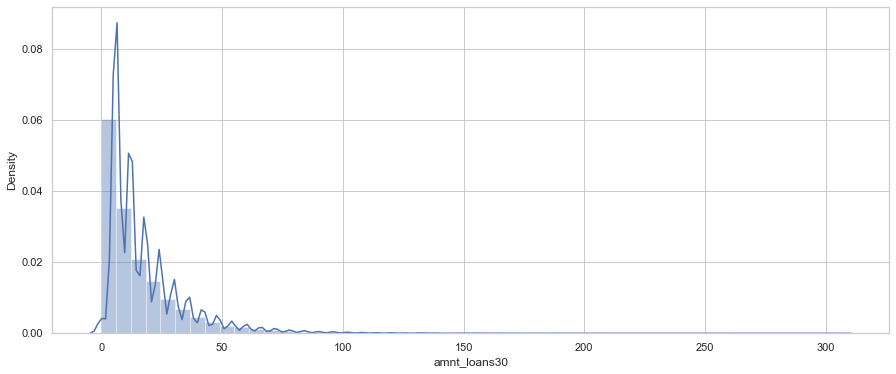

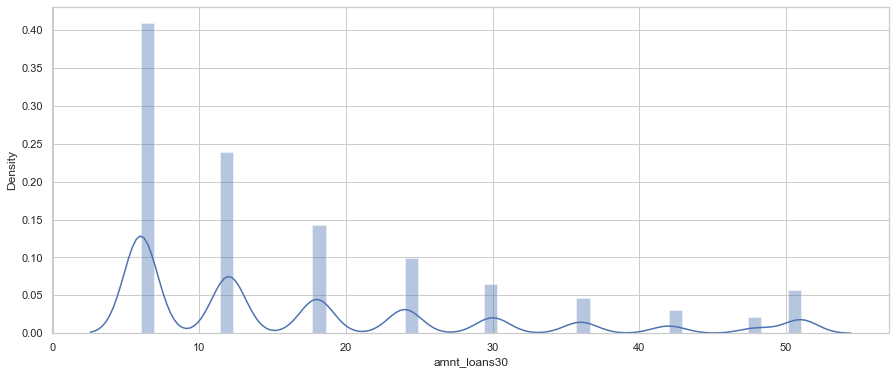

In [62]:
#amnt_loans30
outlier_IQR3(dataset,"amnt_loans30")

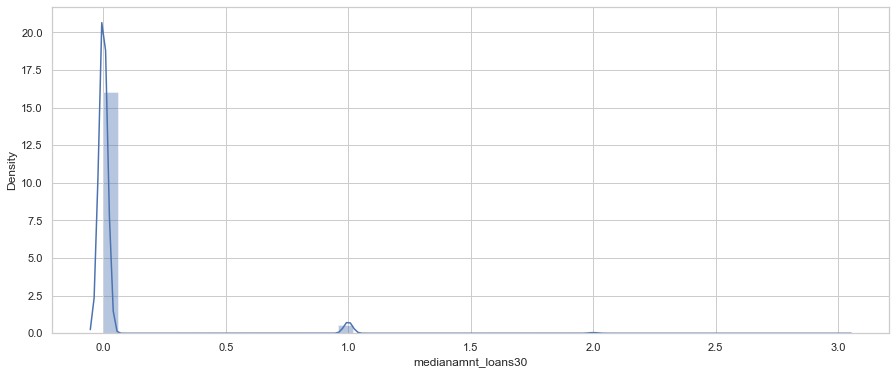

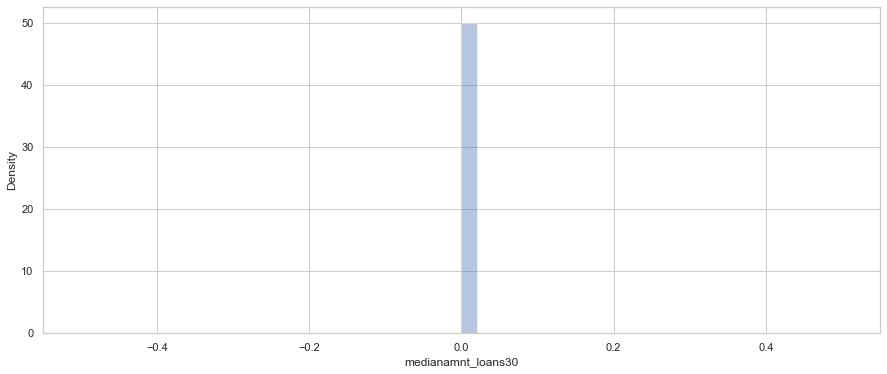

In [63]:
#medianamnt_loans30
outlier_IQR3(dataset,"medianamnt_loans30")

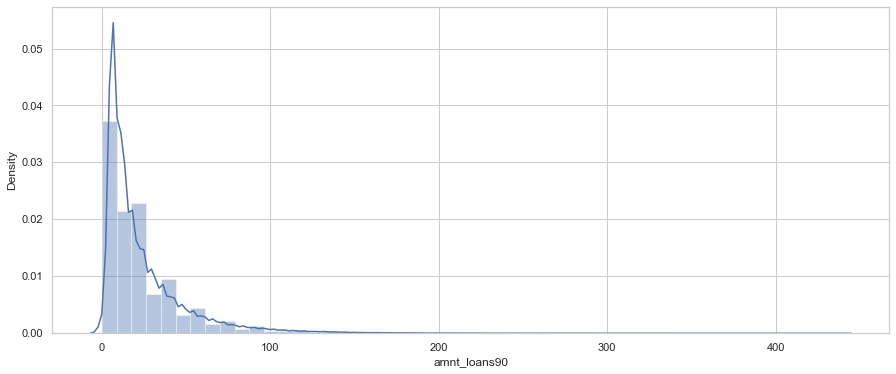

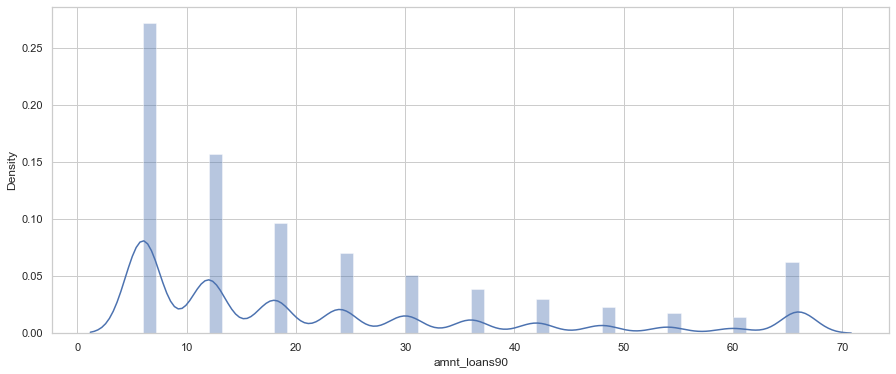

In [64]:
#amnt_loans90
outlier_IQR3(dataset,"amnt_loans90")

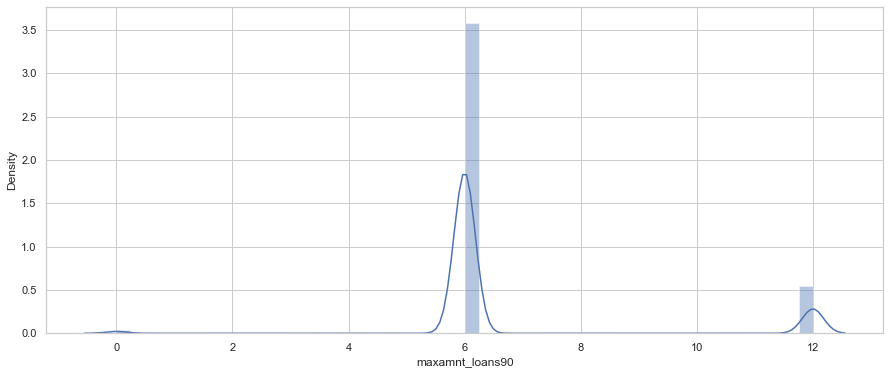

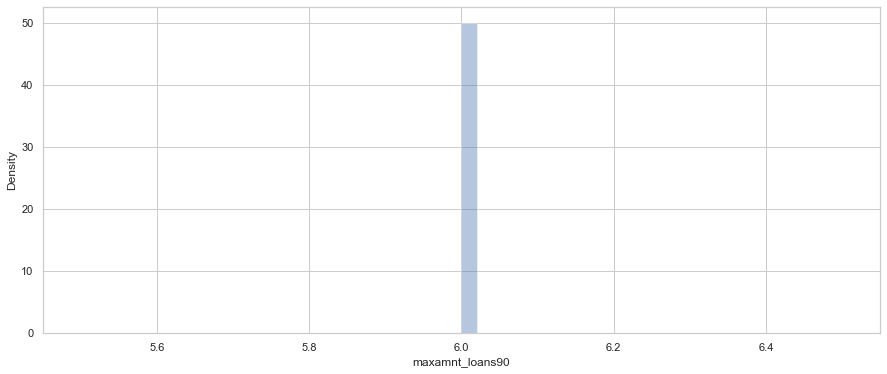

In [65]:
#maxamnt_loans90
outlier_IQR3(dataset,"maxamnt_loans90")

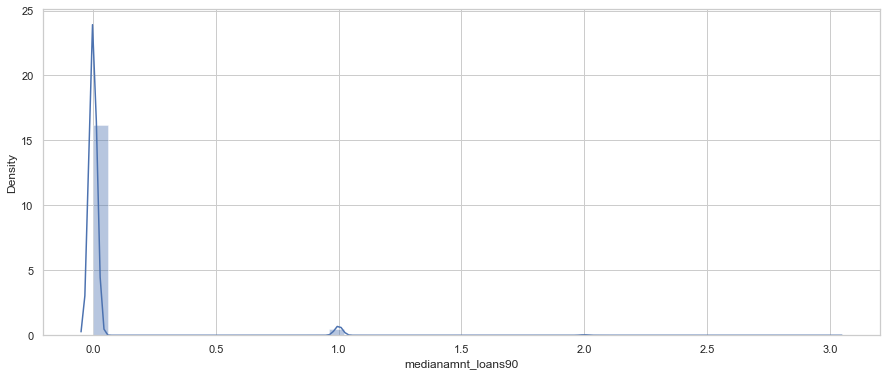

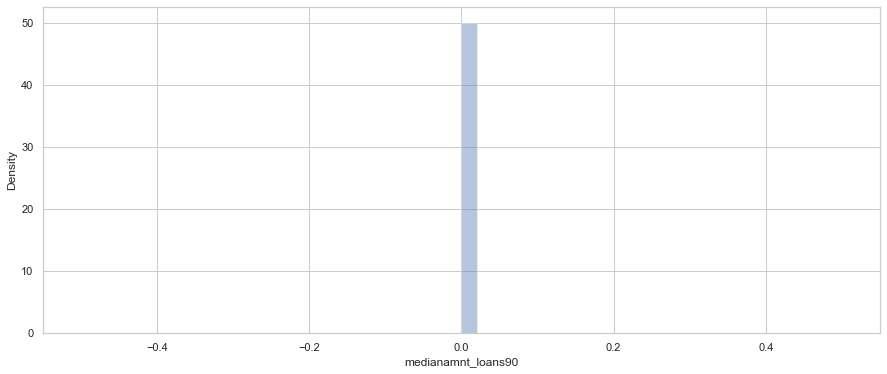

In [66]:
#medianamnt_loans90
outlier_IQR3(dataset,"medianamnt_loans90")

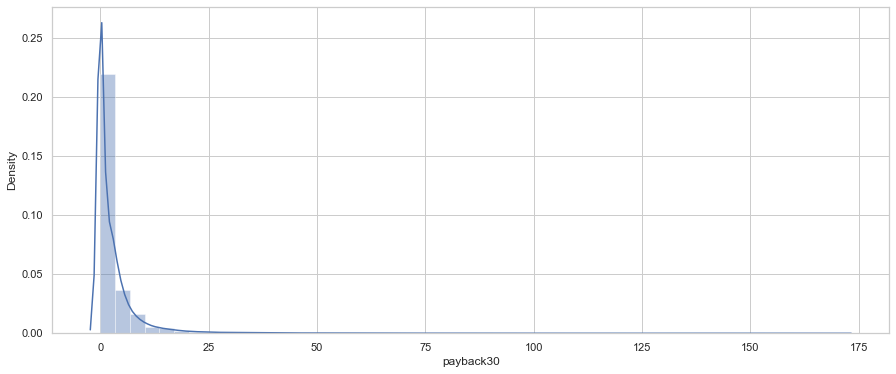

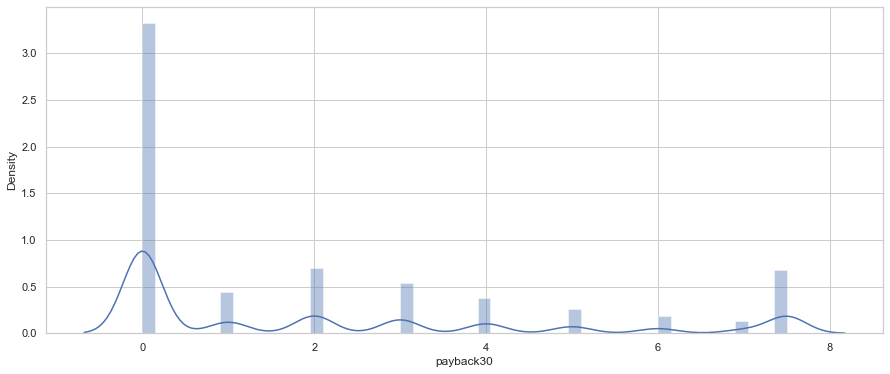

In [67]:
#payback30
outlier_IQR3(dataset,"payback30")

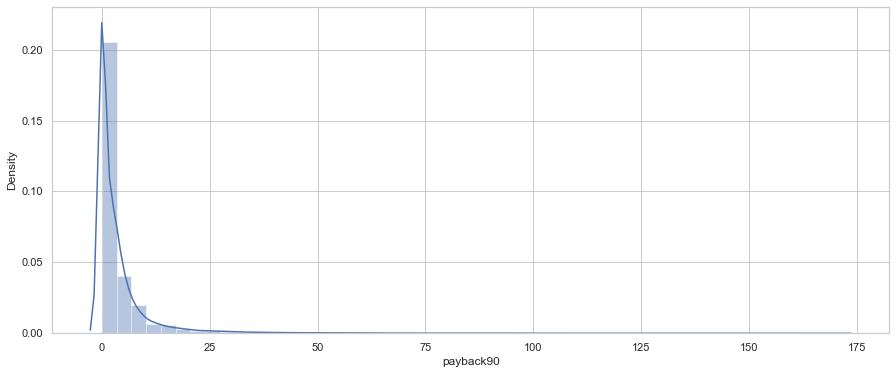

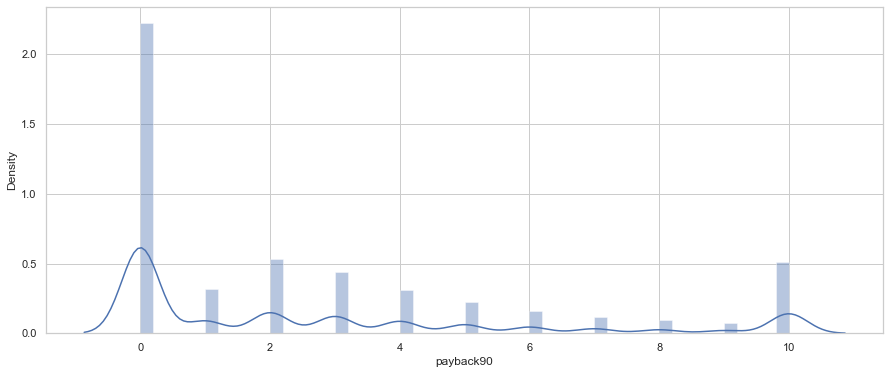

In [68]:
#payback90
outlier_IQR3(dataset,"payback90")

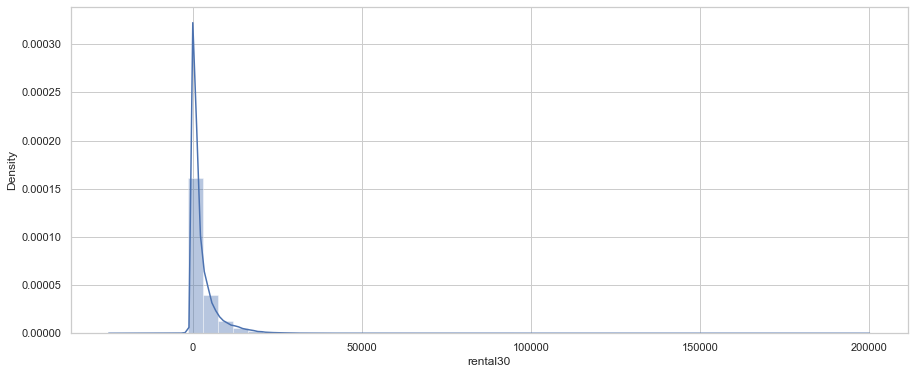

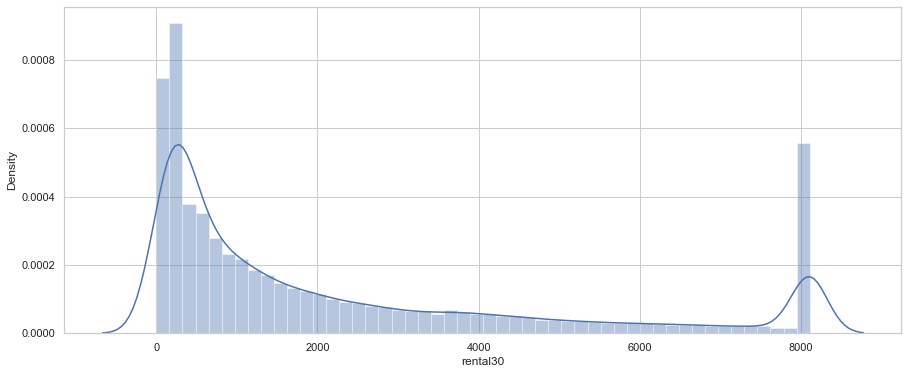

In [69]:
#rental30
outlier_IQR3(dataset,"rental30")

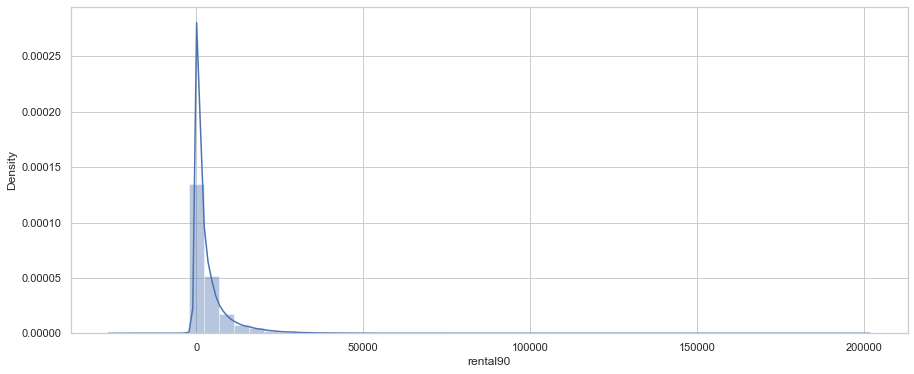

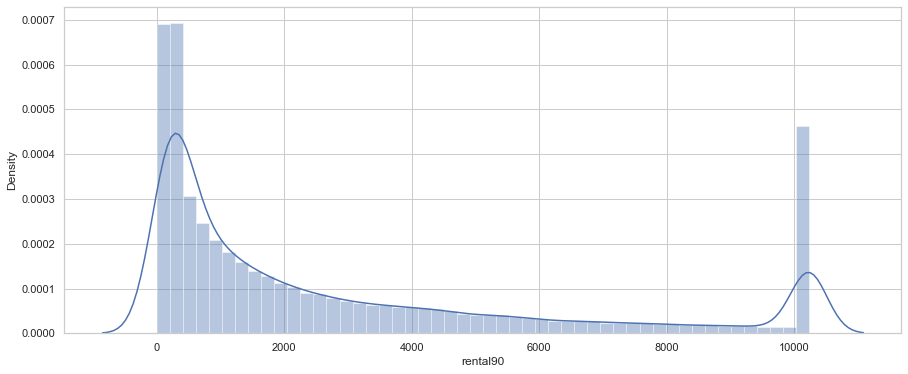

In [70]:
#rental90
outlier_IQR3(dataset,"rental90")

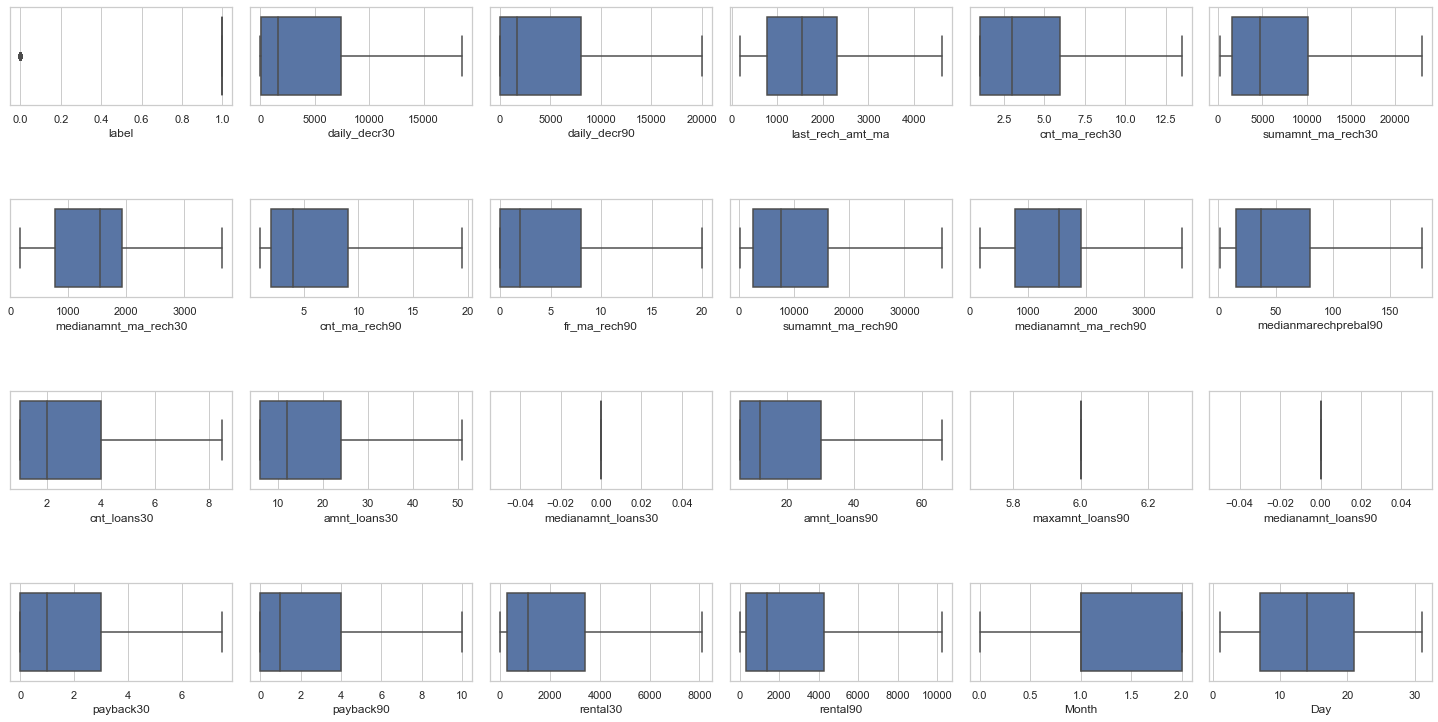

In [71]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=6,nrows=4, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in dataset.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

we have successfully treated the outliers

In [72]:
#checking for skewness
dataset.skew()

label                  -2.386004
daily_decr30            1.236626
daily_decr90            1.238174
last_rech_amt_ma        1.219637
cnt_ma_rech30           1.296777
sumamnt_ma_rech30       1.164374
medianamnt_ma_rech30    1.111337
cnt_ma_rech90           1.198376
fr_ma_rech90            1.166243
sumamnt_ma_rech90       1.171799
medianamnt_ma_rech90    1.083289
medianmarechprebal90    1.162919
cnt_loans30             1.344244
amnt_loans30            1.232243
medianamnt_loans30      0.000000
amnt_loans90            1.199601
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               1.039788
payback90               1.125549
rental30                1.226706
rental90                1.219198
Month                  -0.311710
Day                     0.195099
dtype: float64

there are skewness in most of the columns 

In [73]:
#spliting data in x and y
x=dataset.drop("label", axis=1)
x

,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Month,Day
0,3055.0,3065.0,1539.0,2.0,3078.0,1539.0,2.0,20.0,3078.0,1539.0,7.0,2.0,12.0,0.0,12.0,6.0,0.0,7.5,10.0,220.0,260.0,1,20
1,12122.0,12124.0,4617.5,1.0,5787.0,3655.0,1.0,0.0,5787.0,3650.5,61.0,1.0,12.0,0.0,12.0,6.0,0.0,0.0,0.0,3691.0,3691.0,0,10
2,1398.0,1398.0,1539.0,1.0,1539.0,1539.0,1.0,0.0,1539.0,1539.0,66.0,1.0,6.0,0.0,6.0,6.0,0.0,0.0,0.0,900.0,900.0,0,19
3,21.0,21.0,947.0,1.0,1546.0,770.0,1.0,0.0,947.0,947.0,2.0,2.0,12.0,0.0,12.0,6.0,0.0,0.0,0.0,159.0,159.0,2,6
4,150.0,150.0,2309.0,7.0,20029.0,2309.0,8.0,2.0,23496.0,2888.0,35.0,7.0,42.0,0.0,42.0,6.0,0.0,2.0,2.0,1098.0,1098.0,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,151.0,151.0,4048.0,3.0,10404.0,3178.0,3.0,2.0,10404.0,3178.0,91.0,2.0,12.0,0.0,12.0,6.0,0.0,1.0,1.0,1089.0,1089.0,2,17
209589,36.0,36.0,773.0,4.0,3092.0,773.0,6.0,2.0,4038.0,773.0,111.0,3.0,18.0,0.0,18.0,6.0,0.0,1.0,1.0,1728.0,1728.0,2,12
209590,11843.0,11904.0,1539.0,5.0,9334.0,1539.0,11.0,5.0,18592.0,1539.0,47.0,4.0,42.0,0.0,54.0,6.0,0.0,4.0,3.0,5861.0,8893.0,1,29
209591,12488.0,12574.0,773.0,5.0,12154.0,773.0,6.0,4.0,17941.0,2410.0,100.0,2.0,18.0,0.0,24.0,6.0,0.0,0.0,10.0,411.0,984.0,1,25


In [74]:
y=dataset["label"]
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 203119, dtype: int32

In [75]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform
dataset_new=power_transform(x)
dataset_new=pd.DataFrame(dataset_new,columns=x.columns)

In [76]:
#checking for skewness
dataset_new.skew()

daily_decr30           -0.147939
daily_decr90           -0.141905
last_rech_amt_ma        0.017088
cnt_ma_rech30           0.101558
sumamnt_ma_rech30      -0.017072
medianamnt_ma_rech30    0.016923
cnt_ma_rech90           0.054106
fr_ma_rech90            0.083241
sumamnt_ma_rech90      -0.032791
medianamnt_ma_rech90    0.004903
medianmarechprebal90   -0.010468
cnt_loans30             0.204407
amnt_loans30            0.124039
medianamnt_loans30      0.000000
amnt_loans90            0.099923
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               0.251728
payback90               0.163830
rental30               -0.067495
rental90               -0.075786
Month                  -0.213291
Day                    -0.156970
dtype: float64

In [77]:
x=dataset_new
x

,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,Month,Day
0,0.479481,0.457614,0.166092,-0.422975,-0.443301,0.312728,-0.873873,1.478813,-0.790282,0.263164,-1.590529,0.040750,-0.027570,0.0,-0.245424,0.0,0.0,1.467741,1.500806,-1.008391,-0.983701,-0.294813,0.707860
1,1.157948,1.114193,1.666972,-1.240014,0.197368,1.650747,-1.563177,-1.226282,-0.225529,1.663061,0.456053,-1.083802,-0.027570,0.0,-0.245424,0.0,0.0,-0.952312,-1.033121,0.885631,0.700543,-1.553873,-0.415622
2,0.138604,0.123602,0.166092,-1.240014,-1.122145,0.312728,-1.563177,-1.226282,-1.367445,0.263164,0.538004,-1.083802,-1.148407,0.0,-1.207396,0.0,0.0,-0.952312,-1.033121,-0.168862,-0.283882,-1.553873,0.606641
3,-1.249527,-1.248097,-0.648474,-1.240014,-1.117782,-1.011445,-1.563177,-1.226282,-1.746680,-0.614229,-2.495134,0.040750,-0.027570,0.0,-0.245424,0.0,0.0,-0.952312,-1.033121,-1.176185,-1.224202,1.121593,-0.973860
4,-0.684662,-0.686101,0.771321,1.097580,1.522183,0.979755,0.727531,-0.096698,1.174548,1.302486,-0.109028,1.574521,1.490667,0.0,1.193792,0.0,0.0,0.615362,0.378465,-0.034288,-0.158254,1.121593,0.904896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203114,-0.682510,-0.683971,1.509182,0.083983,0.812330,1.455296,-0.418728,-0.096698,0.334890,1.451403,0.876576,0.040750,-0.027570,0.0,-0.245424,0.0,0.0,0.137489,-0.083492,-0.039944,-0.163534,1.121593,0.398156
203115,-1.108812,-1.107529,-1.021015,0.440272,-0.438773,-1.003290,0.392642,-0.096698,-0.552162,-1.001952,1.089476,0.631069,0.534511,0.0,0.265439,0.0,0.0,0.137489,-0.083492,0.289107,0.143648,1.121593,-0.166715
203116,1.145598,1.104806,0.166092,0.709474,0.697093,0.312728,1.090094,0.521038,0.925647,0.263164,0.187992,0.998089,1.490667,0.0,1.433625,0.0,0.0,1.090683,0.670390,1.286156,1.436106,-0.294813,1.547744
203117,1.173771,1.132929,-1.021015,0.709474,0.978579,-1.003290,0.392642,0.365082,0.888300,1.014501,0.977314,0.040750,0.534511,0.0,0.601836,0.0,0.0,-0.952312,1.500806,-0.659380,-0.228003,-0.294813,1.188501


<AxesSubplot:xlabel='label', ylabel='count'>

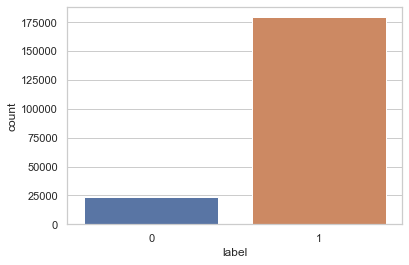

In [78]:
#the dependent varible is unbalenced
sns.countplot(y)

<AxesSubplot:xlabel='label', ylabel='count'>

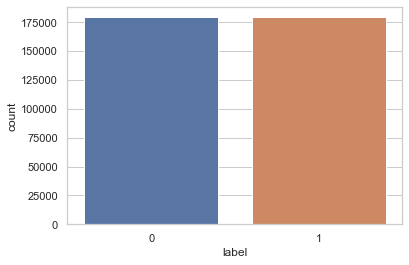

In [79]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)
#balanced data
sns.countplot(y)

In [80]:
#importing libraries for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35, random_state=300)

In [82]:
print(x_train)
print(x_train.shape)

        daily_decr30  daily_decr90  last_rech_amt_ma  cnt_ma_rech30  \
262986     -0.099562     -0.109755         -1.028345      -1.240014   
180811      0.371984      0.351623          0.166092      -0.422975   
76190      -0.855408     -0.855361         -1.028345       0.709474   
285661      0.001399     -0.010673         -1.028345      -1.240014   
8978       -1.532178     -1.531740         -1.028345      -1.240014   
...              ...           ...               ...            ...   
95241      -1.274452     -1.273039          0.174241       0.083983   
269290      0.350470      0.331049          0.267099       0.083983   
169674     -0.598425     -0.600803          0.166092       1.662432   
322453      0.026245      0.019484         -1.028345      -1.240014   
312529     -0.265345     -0.263739          0.166092      -1.240014   

        sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
262986          -1.117782             -1.011445      -0.873873     

In [83]:
print(y_train)
print(y_train.shape)

262986    0
180811    0
76190     1
285661    0
8978      0
         ..
95241     1
269290    0
169674    1
322453    0
312529    0
Name: label, Length: 233209, dtype: int32
(233209,)


In [84]:
print(x_test)
print(x_test.shape)

        daily_decr30  daily_decr90  last_rech_amt_ma  cnt_ma_rech30  \
70036       0.688919      0.660874         -1.021015       1.097580   
83826       0.842008      0.808860         -1.028345       0.709474   
263246      0.153539      0.141650         -1.028345      -0.422975   
82346      -1.301700     -1.300320          0.166092       0.083983   
175349      0.770440      0.742353          0.166092      -0.422975   
...              ...           ...               ...            ...   
157477     -1.261726     -1.260303         -1.021015       0.083983   
116383      1.389319      1.379265          0.771321       0.440272   
131606     -0.937802     -0.937221          1.666972      -1.240014   
298521     -0.117454     -0.127103          0.173348      -1.240014   
272833      1.206515      1.161889          1.666972      -1.240014   

        sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
70036            0.498868             -1.003290       0.572747     

In [85]:
print(y_test)
print(y_test.shape)

70036     1
83826     1
263246    0
82346     1
175349    1
         ..
157477    1
116383    1
131606    1
298521    0
272833    0
Name: label, Length: 125575, dtype: int32
(125575,)


In [86]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [87]:
#LogisticRegression
model(LogisticRegression)

The classification report is:
                   precision    recall  f1-score   support

           0       0.75      0.77      0.76     62625
           1       0.76      0.74      0.75     62950

    accuracy                           0.76    125575
   macro avg       0.76      0.76      0.76    125575
weighted avg       0.76      0.76      0.76    125575

The accuracy score is:  0.7564324109098148
The confusion matrix is:
    
     [[48132 14493]
 [16093 46857]]


In [88]:
print(cross_val_score(LogisticRegression(),x,y,cv=5).mean())

0.7560203440558905


In [89]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.91      0.91      0.91     62625
           1       0.91      0.91      0.91     62950

    accuracy                           0.91    125575
   macro avg       0.91      0.91      0.91    125575
weighted avg       0.91      0.91      0.91    125575

The accuracy score is:  0.9097431813657177
The confusion matrix is:
    
     [[57267  5358]
 [ 5976 56974]]


In [90]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.9112419092497394


In [91]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.95      0.96      0.95     62625
           1       0.96      0.95      0.95     62950

    accuracy                           0.95    125575
   macro avg       0.95      0.95      0.95    125575
weighted avg       0.95      0.95      0.95    125575

The accuracy score is:  0.9509376866414493
The confusion matrix is:
    
     [[59867  2758]
 [ 3403 59547]]


In [92]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9504855762839568


In [93]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.72      0.79      0.75     62625
           1       0.77      0.70      0.73     62950

    accuracy                           0.74    125575
   macro avg       0.75      0.74      0.74    125575
weighted avg       0.75      0.74      0.74    125575

The accuracy score is:  0.7444475413099741
The confusion matrix is:
    
     [[49339 13286]
 [18805 44145]]


In [94]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.7449969973676177


In RandomForestClassifier model the accurcay score is high , also the differance in crossvalscore and accuracy score is minimum so RandomForestClassifier is our best model

In [95]:
#parameters for hyperparametertuning
parameter = {
    "n_estimators":[50,100,150,200],
    "criterion":['entropy','gini'],
    "min_samples_leaf":range(5)
            } 

In [96]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [97]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': range(0, 5),
                         'n_estimators': [50, 100, 150, 200]})

In [98]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 200}

In [100]:
#building final model
best_model=RandomForestClassifier(criterion='entropy',n_estimators=200,min_samples_leaf=1)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("""The classification report is:
       """,classification_report(y_test, pred))
       
print("The accuracy score is: ", accuracy_score(y_test,pred))
    
    
print("""The confusion matrix is: 
      """,confusion_matrix(y_test,pred))

The classification report is:
                      precision    recall  f1-score   support

           0       0.95      0.96      0.95     62625
           1       0.96      0.95      0.95     62950

    accuracy                           0.95    125575
   macro avg       0.95      0.95      0.95    125575
weighted avg       0.95      0.95      0.95    125575

The accuracy score is:  0.9510332470635079
The confusion matrix is: 
       [[59828  2797]
 [ 3352 59598]]


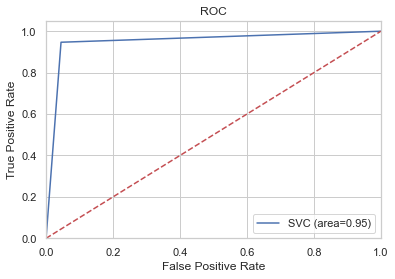

In [101]:
#auc_roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="SVC (area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("SVC_ROC")
plt.show()

In [102]:
#around 95 percent of the area is covered, so our model is working good

In [103]:
#savingThemodel
import joblib
joblib.dump(best_model,"Micro-Credit-Defaulter-Model.pkl")

['Micro-Credit-Defaulter-Model.pkl']